# <img style="float: left; padding-right: 0.7cm; width: 3.0cm" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/179px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-1**<br>
**Profesora:** Paula Aguirre <br>
**Integrantes:** Rodolfo Cruz, Nicolas San Martin, Benjamin Santander, Daniela Victorero <br>

----

 <h1><center>Proyecto: Análisis sobre la insuficiencia del desarrollo educacional con relación al rendimiento académico y otras variables.</center></h1>

## Contexto y motivación:

Deseamos saber si existe una relación entre la situación socioeconómica del individuo
y su capital cognitivo, para tomar medidas que permitan mejorar y equiparar el desarrollo
cognitivo del individuo, así como su acceso considerando el contexto de reformas
educacionales y pandemia. En primer lugar, se define capital cognitivo como “la suma de los saberes adquiridos a
consecuencia del capital cultural de origen más las oportunidades educacionales formales”
(Rosas, 2013, pág. 55).
En segundo lugar, según Pierre Bourdieu, se define capital cultural como “al conjunto
de bienes culturales disponibles, transmitidos de generación en generación, los que explican
las diferencias de los resultados escolares y en la ubicación relativa en la pirámide social.”
(Rosas, 2013, pág. 15). Por lo tanto, creemos que sería interesante compararar el rendimiento escolar de los estudiantes en funcion de ciertos indicadores socioeconomicos. (Aprovechamos el uso de la tarea 3 para guiar esta última parte)




## Preguntas objetivo: 

Las preguntas anteriores eran:
1. ¿Es la educación una inversión al largo plazo?
2. ¿Existe una relación entre el nivel socioeconómico del estudiante y capital cognitivo?
3. ¿Influye la ubicación en el rendimiento académico?
4. ¿Cuáles son las regiones con mayor rendimiento académico?
5. ¿Es acaso la inversión al estudiante un factor que determine el éxito académico?

A lo largo del proyecto, se ha decidido enfocar la pregunta a que si existe una relacion entre el nivel socioeconomico del estudiante y su capital congnitivo, debido a la cantidad de informacion presente respecto al tema y tambien considerando las conclusiones obtenidas de la tarea 3 en cuando a la correlacion existente entre variables para un mejor desempeño.


## Datos: 

De la base de datos abiertos del Mineduc recolectamos archivos sobre rendimiento escolar, matricula educacion superior 2022, subvencion establecimientos 2021, Resumen docente/asistentes, directorio de establecimientos educacionales.
Link: https://centroestudios.mineduc.cl/datos-abiertos/

De la base de datos del INE recolectamos archivos sobre Ingreso medio mensual por region 2021.
link: https://www.ine.gob.cl/docs/default-source/encuesta-suplementaria-de-ingresos/cuadros-estadisticos/2021/ingreso-medio-mensual-por-regi%C3%B3n-2010---2021.xlsx?sfvrsn=30ed8da9_6

En aspectos generales, la preparacion de datos se enfocó en transformar variables de interes a tipos necesarios, dropear datos nulos o "0" de ciertas columnas para filtrar mejor el analisis y ,finalmente, la unión de bases de datos para generar como ultima acción el resumen de los datos y relaciones en gráficos combinados.

## Análisis exploratorio de datos: 

En primera parte, nos resulto algo dificil converger el uso de los datos a relaciones especificas, sin embargo, durante todo este tiempo tuvimos tiempo para pensar y creativizar acerca de las posibles utilidades de los datos, que no está más decir, compone a una gran cantidad de datos recolectados y muchos registros por año. A razón de lo anterior, decidimos sesgar nuestra investigación para la región de santiago, para así extrapolar ciertas ideas a las demas regiones de Chile.

Es importante considerar que la base de datos es relativamente nueva, por lo tanto, mezclamos databases de ciertos años con el fin de poder creativizar y practicar el uso de estos para generar posibles relaciones y, de ello, proyecciones y soluciones. Dentro de los datos decidimos por una parte, analizar de qué manera pueden influir los indicadores socioeconomicos y demograficos en el rendimiento, decision y costo escolar. Por lo tanto, basamos nuestra investigacion plenamente en educación basica/media y algunos datos sobre ingreso universitario como proyeccion post-escolar.

## Resumen de los resultados: 


Como grupo pensamos que podria ser util enfocar el estudio del rendimiento estudiantil para la RM, asi luego extrapolar las mismas ideas a un panorama general de todas las regiones en Chile. Por lo tanto, comenzaremos analizando la distribucion de los establecimientos educacionales en santiago de acuerdo a indicadores socioeconomicos/sociodemograficos.

In [1]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
import matplotlib.pyplot as plt
import matplotlib as mlp
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
import geopandas as gpd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from os import path
import warnings
try:
    import zipfile36
except:
    print('Instalar zipfile36: pip install zipfile36')
warnings.filterwarnings('ignore')

In [2]:
data = gpd.read_file("C2017-2012_RM_pob_socioec.gpkg")
data

densidad  pct_adultoMayor  pct_inmigrante  pct_originario    pct_nna  \
0      0.054692         4.581152       35.994764        9.293194  19.633508   
1      0.048181         7.957154       15.455241        6.350421  20.887529   
2      0.010379         6.250000       29.687500        0.000000  21.875000   
3      0.003985         0.000000       46.153846       11.538462  11.538462   
4      0.008718        13.432836       37.313433        0.000000   0.000000   
...         ...              ...             ...             ...        ...   
39896  0.010371        20.261438        7.189542        9.150327  11.111111   
39897  0.016502        20.652174        0.000000       13.043478   0.000000   
39898  0.019252         7.142857       35.714286       16.326531  13.265306   
39899  0.046861        10.389610        0.000000        0.000000  32.467532   
39900  0.010846         8.333333        0.000000       15.000000  23.333333   

       pct_hombres  pct_mujeres  pct_adultos       EDUC  Hacinpunt  \
0        47.513089    52.486911    75.785340  12.296209        120   
1        46.595256    53.404744    71.155318  12.212580        120   
2        50.000000    50.000000    71.875000  10.868421        120   
3        48.076923    51.923077    69.230769  11.500000        120   
4        52.238806    47.761194    73.134328   9.692308        120   
...            ...          ...          ...        ...        ...   
39896    51.633987    48.366013    68.627451   9.700000        200   
39897    58.695652    41.304348    68.478261   8.826531        120   
39898    53.061224    46.938776    79.591837   0.000000          0   
39899    50.649351    49.350649    57.142857   7.914634        120   
39900    51.666667    48.333333    68.333333   9.210526        120   

              NSE                                           geometry  
0      615.703002  POLYGON ((344096.410 6300127.298, 344107.550 6...  
1      565.386146  POLYGON ((344409.506 6299902.537, 344265.614 6...  
2      538.684211  POLYGON ((343989.345 6300001.313, 343988.286 6...  
3      533.823529  POLYGON ((343776.213 6299893.815, 343773.421 6...  
4      459.769231  POLYGON ((343998.500 6299870.782, 343948.879 6...  
...           ...                                                ...  
39896  575.708333  MULTIPOLYGON (((345130.403 6292602.454, 345133...  
39897  431.309524  POLYGON ((343516.840 6292797.778, 343464.863 6...  
39898    0.000000  MULTIPOLYGON (((343621.691 6292917.766, 343571...  
39899  399.996791  POLYGON ((343209.239 6292809.688, 343215.843 6...  
39900  412.894737  MULTIPOLYGON (((343286.965 6292800.216, 343248...  

[39901 rows x 12 columns]

Text(0.5, 1.0, 'Distribucion de población en Santiago según CENSO 2012-2018')

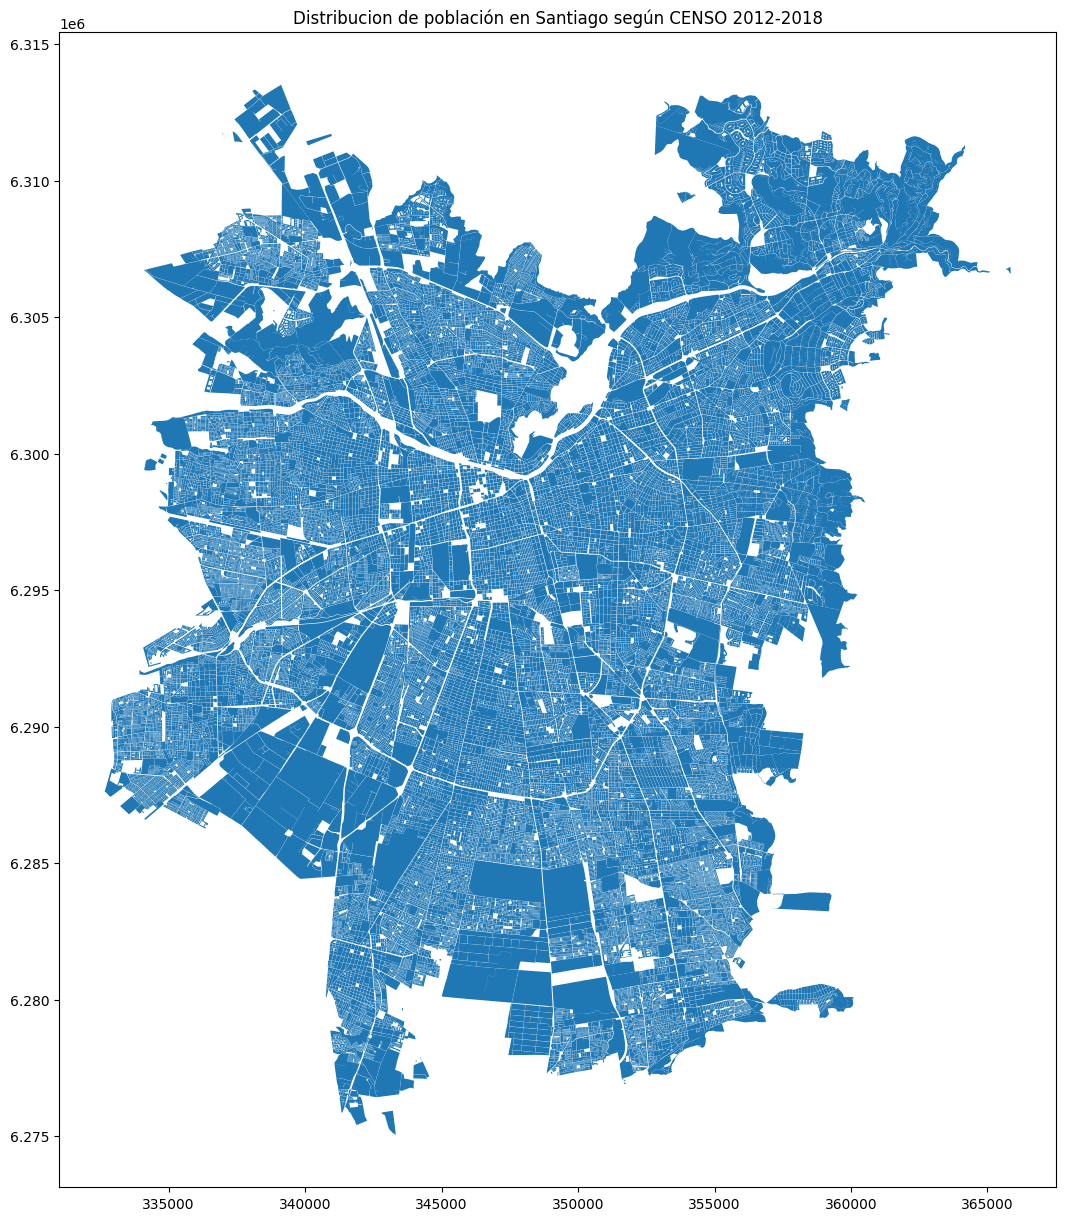

In [3]:
fig, ax = plt.subplots(figsize = (20, 15))
data.plot(ax = ax)
ax.set_title("Distribucion de población en Santiago según CENSO 2012-2018")

In [4]:
geometry = data["geometry"]
data.drop("geometry", axis = 1, inplace=True)

In [5]:
scaler = StandardScaler()
data_sc = scaler.fit_transform(data)
data_sc

array([[ 2.62755543, -0.85066647,  3.4884121 , ...,  0.92240589,
        -0.19439716,  0.77193235],
       [ 2.13041708, -0.45537733,  1.20574721, ...,  0.88918019,
        -0.19439716,  0.41565012],
       [-0.75603497, -0.65526446,  2.78745275, ...,  0.35514714,
        -0.19439716,  0.22657977],
       ...,
       [-0.07849973, -0.55072165,  3.45724103, ..., -3.96286723,
        -3.62881875, -3.58772092],
       [ 2.02956951, -0.17056597, -0.51187473, ..., -0.81838986,
        -0.19439716, -0.75543439],
       [-0.72039556, -0.41133123, -0.51187473, ..., -0.30353302,
        -0.19439716, -0.66410696]])

In [6]:
inertia=[]
kmax=12
for i in range(1,kmax):

    kmeans = KMeans(n_clusters=i,n_init=10)
    kncl= kmeans.fit(data_sc)

    print(i,kncl.inertia_)
    inertia.append(kncl.inertia_)

1 438911.0000000001
2 367270.75366697315
3 327679.43930305523
4 299239.16577079275
5 276220.21213143715
6 258000.49932463776
7 238543.19438593226
8 225958.22638543084
9 215382.43248945117
10 205055.07588738317
11 197390.99372111395


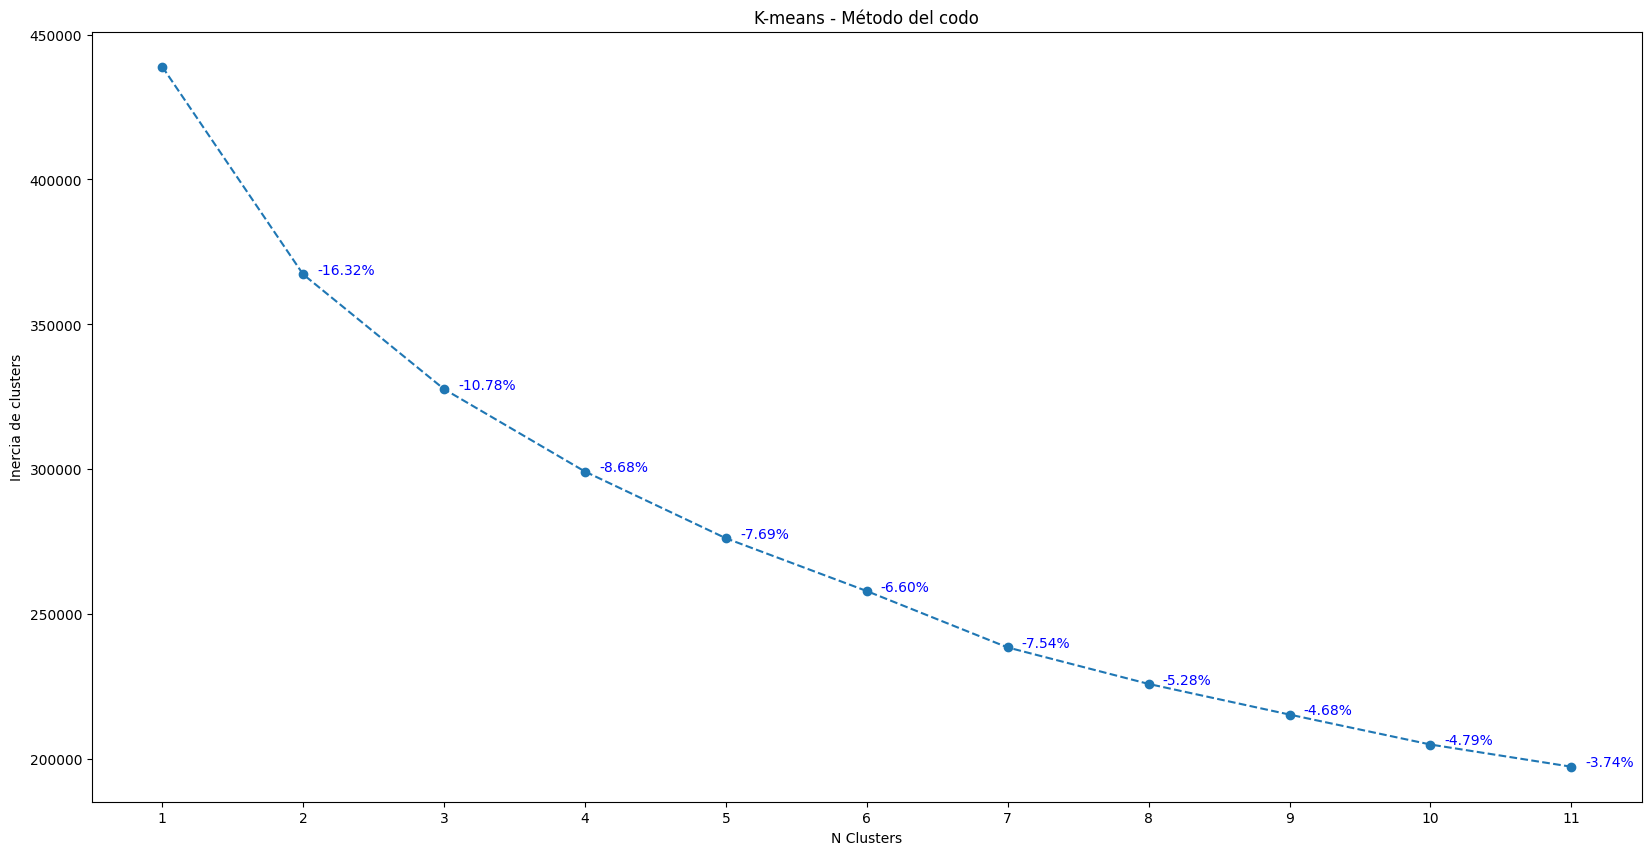

In [7]:
f, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(range(1,kmax),inertia,marker='o',ls='--')
ax.set_xlabel('N Clusters')
ax.set_ylabel('Inercia de clusters')
ax.set_title('K-means - Método del codo')

for i in range(1,len(inertia)):
    delta=(-inertia[i-1]+inertia[i])/inertia[i-1]*100
    ax.text(i+1.1,inertia[i],'%.2f'%delta+'%',color='b')
ax.set_xticks(range(1,kmax))

plt.show()

In [8]:
k=5

# Inicializamos la instancia  KMeans 
kmeans = KMeans(n_clusters=k,random_state=0)


# Correr el algoritmo sobre el conjunto de variable normalizadas
kcls = kmeans.fit(data_sc)

In [9]:
data['kcls_labels'] = kcls.labels_
centers = kcls.cluster_centers_
centers_i = scaler.inverse_transform(centers)
centers_i

array([[2.47980548e-02, 8.13923400e+00, 3.36976087e+01, 8.44597613e+00,
        1.26331725e+01, 5.17736317e+01, 4.80205011e+01, 7.48466238e+01,
        1.07414002e+01, 1.22038085e+02, 5.19866272e+02],
       [1.21837493e-02, 1.56362092e+01, 5.79985594e+00, 4.26196833e+00,
        1.04596386e+01, 4.60767073e+01, 5.34525198e+01, 6.59858004e+01,
        1.31735032e+01, 1.99576304e+02, 7.35133886e+02],
       [2.70965741e-02, 8.84284742e+00, 2.59656171e+00, 1.40403079e+01,
        1.97750545e+01, 4.93164724e+01, 5.06319102e+01, 6.89888812e+01,
        8.93262355e+00, 1.19341592e+02, 4.45714973e+02],
       [1.48066352e-02, 1.50150566e+01, 2.52907426e+00, 7.01670890e+00,
        9.36311468e+00, 4.74344904e+01, 5.23775135e+01, 6.79808604e+01,
        1.07359058e+01, 1.19995822e+02, 5.35209896e+02],
       [1.30038388e-02, 6.89540659e+00, 6.72370690e+00, 7.30792396e+00,
        1.16558771e+01, 4.59804289e+01, 4.57333187e+01, 6.34613901e+01,
        2.43470646e-02, 3.38983051e-01, 1.17815073e+

In [10]:
data["geometry"] = geometry

<AxesSubplot:>

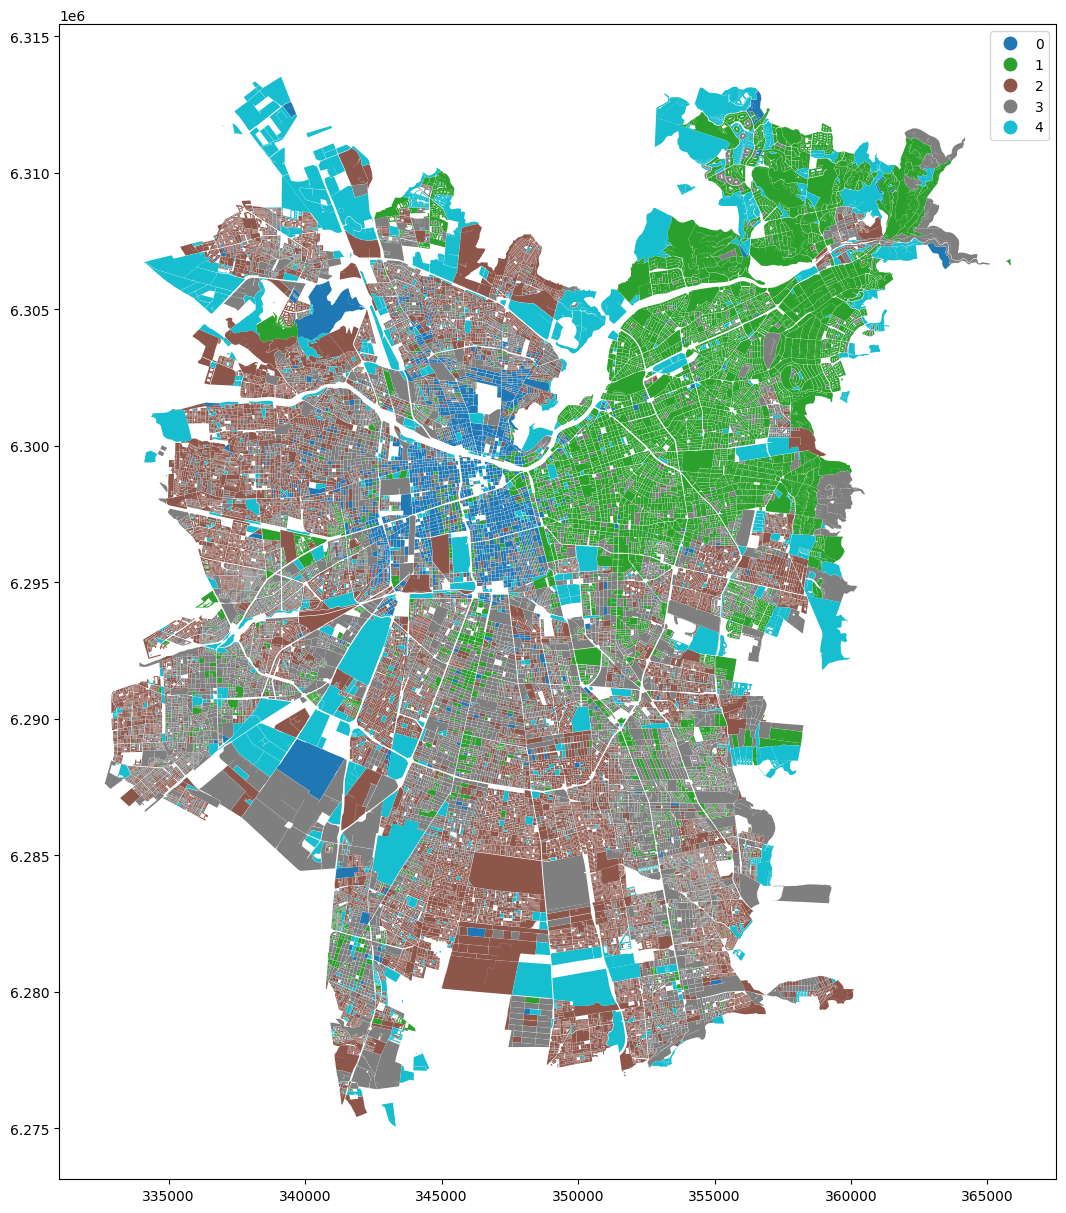

In [11]:
data.plot(figsize=(20,15),column = "kcls_labels", categorical = True, legend = True)

In [12]:
values = data.groupby(by = "kcls_labels").mean().sort_values(by="NSE")
data.groupby(by = "kcls_labels").mean().sort_values(by="NSE")

densidad  pct_adultoMayor  pct_inmigrante  pct_originario  \
kcls_labels                                                              
4            0.013004         6.895407        6.723707        7.307924   
2            0.027116         8.853538        2.595868       14.061052   
0            0.024806         8.138857       33.704164        8.450325   
3            0.014819        14.982260        2.531217        7.011654   
1            0.012185        15.639277        5.800994        4.262805   

               pct_nna  pct_hombres  pct_mujeres  pct_adultos       EDUC  \
kcls_labels                                                                
4            11.655877    45.980429    45.733319    63.461390   0.024347   
2            19.782820    49.318737    50.629518    68.973571   8.928894   
0            12.633033    51.777037    48.016990    74.844884  10.741884   
3             9.385106    47.436700    52.375891    68.003759  10.735249   
1            10.459729    46.077900    53.451235    65.983443  13.173167   

              Hacinpunt         NSE  
kcls_labels                          
4              0.338983    1.178151  
2            119.339964  445.512391  
0            122.039135  519.862657  
3            119.995835  535.201962  
1            199.591917  735.130184

In [13]:
colegios = pd.read_csv("Directorio_Oficial_EE_2021.csv", sep=";")
colegios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16498 entries, 0 to 16497
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGNO            16498 non-null  int64 
 1   RBD             16498 non-null  int64 
 2   DGV_RBD         16498 non-null  int64 
 3   NOM_RBD         16468 non-null  object
 4   MRUN            16498 non-null  object
 5   RUT_SOSTENEDOR  16498 non-null  object
 6   P_JURIDICA      16498 non-null  int64 
 7   COD_REG_RBD     16498 non-null  int64 
 8   NOM_REG_RBD_A   16498 non-null  object
 9   COD_PRO_RBD     16498 non-null  int64 
 10  COD_COM_RBD     16498 non-null  int64 
 11  NOM_COM_RBD     16498 non-null  object
 12  COD_DEPROV_RBD  16498 non-null  int64 
 13  NOM_DEPROV_RBD  16498 non-null  object
 14  COD_DEPE        16498 non-null  int64 
 15  COD_DEPE2       16498 non-null  int64 
 16  RURAL_RBD       16498 non-null  int64 
 17  LATITUD         16498 non-null  object
 18  LONGIT

In [14]:
colegios[colegios["NOM_COM_RBD"] == "PUENTE ALTO"]

AGNO    RBD  DGV_RBD                                      NOM_RBD MRUN  \
7524   2021   9280        0                                C.DIAGNOSTICO        
8329   2021  10449        3                        ESCUELA CAMINO DE LUZ        
8330   2021  10450        7                          ESCUELA CONSOLIDADA        
8331   2021  10451        5                    LICEO GENERAL PEDRO LAGOS        
8332   2021  10452        3                            LICEO PUENTE ALTO        
...     ...    ...      ...                                          ...  ...   
15654  2021  31500        1  ESC. BASICA Nº230 EL SEMBRADOR CASAS VIEJAS        
16113  2021  41152        3                CENTRO VITAMINA CONCHA Y TORO        
16182  2021  41300        3                   JARDIN INFANTIL CORDILLERA        
16250  2021  41460        3            CENTRO VITAMINA PLAZA PUENTE ALTO        
16461  2021  41859        5    ESCUELA BASICA COLEGIO TRIGALES DEL MAIPO        

      RUT_SOSTENEDOR  P_JURIDICA  COD_REG_RBD NOM_REG_RBD_A  COD_PRO_RBD  ...  \
7524                           9           13            RM          132  ...   
8329        70856400           1           13            RM          132  ...   
8330        70856400           1           13            RM          132  ...   
8331        70856400           1           13            RM          132  ...   
8332        70856400           1           13            RM          132  ...   
...              ...         ...          ...           ...          ...  ...   
15654       65122137           1           13            RM          132  ...   
16113       76407810           1           13            RM          132  ...   
16182       76341963           1           13            RM          132  ...   
16250       76407810           1           13            RM          132  ...   
16461       73045100           1           13            RM          132  ...   

       ENS_08 ENS_09  ENS_10 ENS_11  MATRICULA  ESTADO_ESTAB  ORI_RELIGIOSA  \
7524        0      0       0      0          0             3              9   
8329        0      0       0      0          1             1              1   
8330        0      0       0      0          1             1              1   
8331        0      0       0      0          0             3              9   
8332        0      0       0      0          1             1              1   
...       ...    ...     ...    ...        ...           ...            ...   
15654       0      0       0      0          1             1              1   
16113       0      0       0      0          0             1              9   
16182       0      0       0      0          0             3              9   
16250       0      0       0      0          0             1              9   
16461       0      0       0      0          1             1              2   

      ORI_OTRO_GLOSA   PAGO_MATRICULA     PAGO_MENSUAL  
7524                  SIN INFORMACION  SIN INFORMACION  
8329                         GRATUITO         GRATUITO  
8330                         GRATUITO         GRATUITO  
8331                  SIN INFORMACION  SIN INFORMACION  
8332                         GRATUITO         GRATUITO  
...              ...              ...              ...  
15654                        GRATUITO         GRATUITO  
16113                 SIN INFORMACION  SIN INFORMACION  
16182                 SIN INFORMACION  SIN INFORMACION  
16250                 SIN INFORMACION  SIN INFORMACION  
16461                        GRATUITO         GRATUITO  

[265 rows x 37 columns]

In [15]:
colegios["LONGITUD"] = colegios["LONGITUD"].replace(" ", np.nan)
colegios["LATITUD"] = colegios["LATITUD"].replace(" ", np.nan)
colegios.dropna()
colegios["LONGITUD"] = colegios["LONGITUD"].str.replace(",",".").astype(np.float64)
colegios["LATITUD"] = colegios["LATITUD"].str.replace(",",".").astype(np.float64)
colegios = colegios[colegios["LONGITUD"] <= -50]

In [16]:
localizaciones = gpd.GeoDataFrame(colegios, geometry= gpd.points_from_xy(colegios["LONGITUD"], colegios["LATITUD"]), crs = 4326)

In [17]:
codigos = [13101, 13102, 13103, 13104, 13105, 13106, 13107, 13108, 13109, 13110, 13111, 13112, 13113, 13114, 13115, 13116, 13117, 13118, 13119, 13120, 13121, 13122, 13123, 13124, 13125, 13126, 13127, 13128, 13129, 13130, 13131, 13132, 13201, 13202, 13401, ]
localizaciones = localizaciones[localizaciones["COD_COM_RBD"].isin(codigos) == True]

In [18]:
data = data.to_crs(4326)

<AxesSubplot:>

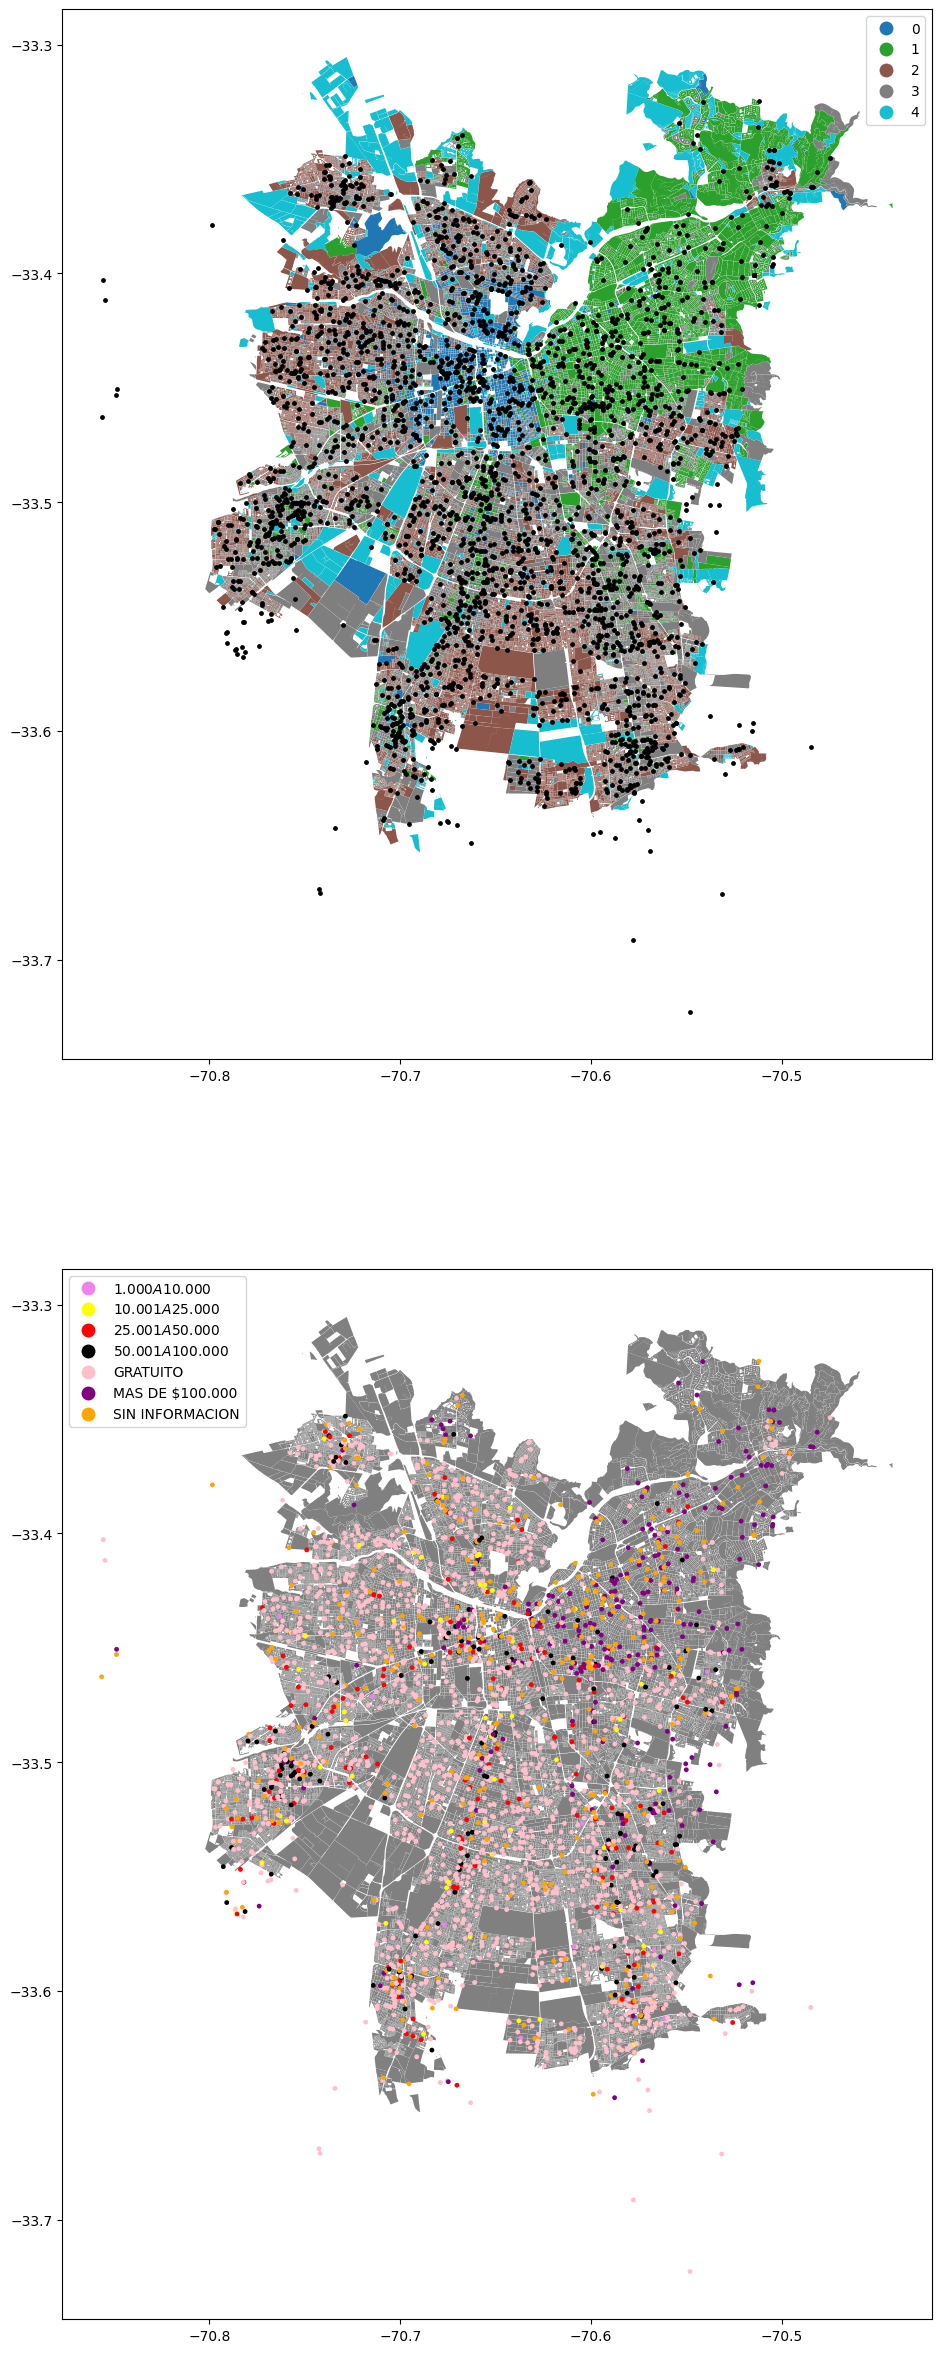

In [19]:
palette = {'GRATUITO': 'violet', '$1.000 A $10.000': 'orange', '$10.001 A $25.000' : 'yellow', '$25.001 A $50.000' : 'black', '$50.001 A $100.000' : 'red', 'MAS DE $100.000' : 'pink', "SIN INFORMACION":"purple"}
cmap = mlp.colors.ListedColormap([palette[b] for b in localizaciones['PAGO_MENSUAL'].unique()])

fig , ax= plt.subplots(2, 1, figsize=(40, 30))
plot_mapa = data.plot(ax = ax[0],column = "kcls_labels", categorical = True, legend = True)
localizaciones.plot(ax = plot_mapa, markersize=6, color = "black")
ax1 = data.plot(ax = ax[1], color = "gray")
localizaciones.plot(ax = ax1, markersize=6, cmap=cmap ,categorical = True, column="PAGO_MENSUAL", legend=True)

Con el grafico anterior podemos observar la distribucion de los establecimientos educacionales en relacion a los indicadores socioeconomicos / sociodemograficos. De esto es interesante descubrir ciertas relaciones de cantidad establecimientos v/s percepcion de calidad de vida. Aprovechando las columnas del dataset tambien podemos agregar el valor de pago mensual de cada estableciento. Tambien encontramos una relacion entre la red vial del Gran Santiago y el acceso a los establecimientos, donde alejados de las grandes carreteras, encontramos mayor cantidad de colegios gratuito a excepcion de la comuna de Providencia/Las Condes/Lo Barnechea/ Vitacura.

##### Obtenemos los promedios de los cluster

In [20]:
data.groupby("kcls_labels").mean()

densidad  pct_adultoMayor  pct_inmigrante  pct_originario  \
kcls_labels                                                              
0            0.024806         8.138857       33.704164        8.450325   
1            0.012185        15.639277        5.800994        4.262805   
2            0.027116         8.853538        2.595868       14.061052   
3            0.014819        14.982260        2.531217        7.011654   
4            0.013004         6.895407        6.723707        7.307924   

               pct_nna  pct_hombres  pct_mujeres  pct_adultos       EDUC  \
kcls_labels                                                                
0            12.633033    51.777037    48.016990    74.844884  10.741884   
1            10.459729    46.077900    53.451235    65.983443  13.173167   
2            19.782820    49.318737    50.629518    68.973571   8.928894   
3             9.385106    47.436700    52.375891    68.003759  10.735249   
4            11.655877    45.980429    45.733319    63.461390   0.024347   

              Hacinpunt         NSE  
kcls_labels                          
0            122.039135  519.862657  
1            199.591917  735.130184  
2            119.339964  445.512391  
3            119.995835  535.201962  
4              0.338983    1.178151

##### Ahora investigaremos el rendimiento de los estudiantes de cada comuna de santiago en funcion de la jornada escolar que cumplen, es decir, si van por la manana (1), por la tarde (2) o jornada completa (3).

In [21]:
# si queremos el archivo csv cambiamos esta variable
crear_archivo = False

In [22]:
df_2 = pd.read_csv('promedios.zip',compression='zip', sep=';')
dic = {}
for i in df_2.columns:
    dic[i] = i.upper()
df_2.rename(dic, axis=1, inplace=True)
df_2[f'PROM_GRAL'] = df_2[f'PROM_GRAL'].replace(',', '.', regex=True)
df_2[f'PROM_GRAL'] = df_2[f'PROM_GRAL'].astype(np.float64)
df_2 = df_2[df_2[f'PROM_GRAL'] != 0]
df_2 = df_2[['MRUN', 'PROM_GRAL','ASISTENCIA', 'SIT_FIN_R','COD_COM_RBD', 'COD_JOR', 'NOM_COM_RBD']]
df_2['COD_JOR'] = df_2['COD_JOR'].astype(np.int64)
df_2 = df_2[(df_2['COD_JOR'] == 1) | (df_2['COD_JOR'] == 2) | (df_2['COD_JOR'] == 3)]
comunas = df_2.copy()
if crear_archivo:
    df_2.to_csv(f'jornadas20', index=False)



In [23]:
df_2 = pd.read_csv('promedios.zip',compression='zip', sep=';')
dic = {}
for i in df_2.columns:
    dic[i] = i.upper()
df_2.rename(dic, axis=1, inplace=True)
df_2[f'PROM_GRAL'] = df_2[f'PROM_GRAL'].replace(',', '.', regex=True)
df_2[f'PROM_GRAL'] = df_2[f'PROM_GRAL'].astype(np.float64)
df_2 = df_2[df_2[f'PROM_GRAL'] != 0]
df_2 = df_2[['MRUN', 'PROM_GRAL','ASISTENCIA', 'SIT_FIN_R','COD_REG_RBD', 'COD_JOR', 'NOM_REG_RBD_A']]
df_2['COD_JOR'] = df_2['COD_JOR'].astype(np.int64)
df_2 = df_2[(df_2['COD_JOR'] == 1) | (df_2['COD_JOR'] == 2) | (df_2['COD_JOR'] == 3)]
regiones = df_2.copy()
if crear_archivo:
    df_2.to_csv(f'jornadas_region20', index=False)


In [24]:
codigos = [13101, 13102, 13103, 13104, 13105, 13106, 13107, 13108, 13109, 13110, 13111, 13112, 13113, 13114, 13115, 13116, 13117, 13118, 13119, 13120, 13121, 13122, 13123, 13124, 13125, 13126, 13127, 13128, 13129, 13130, 13131, 13132, 13201, 13202, 13401]

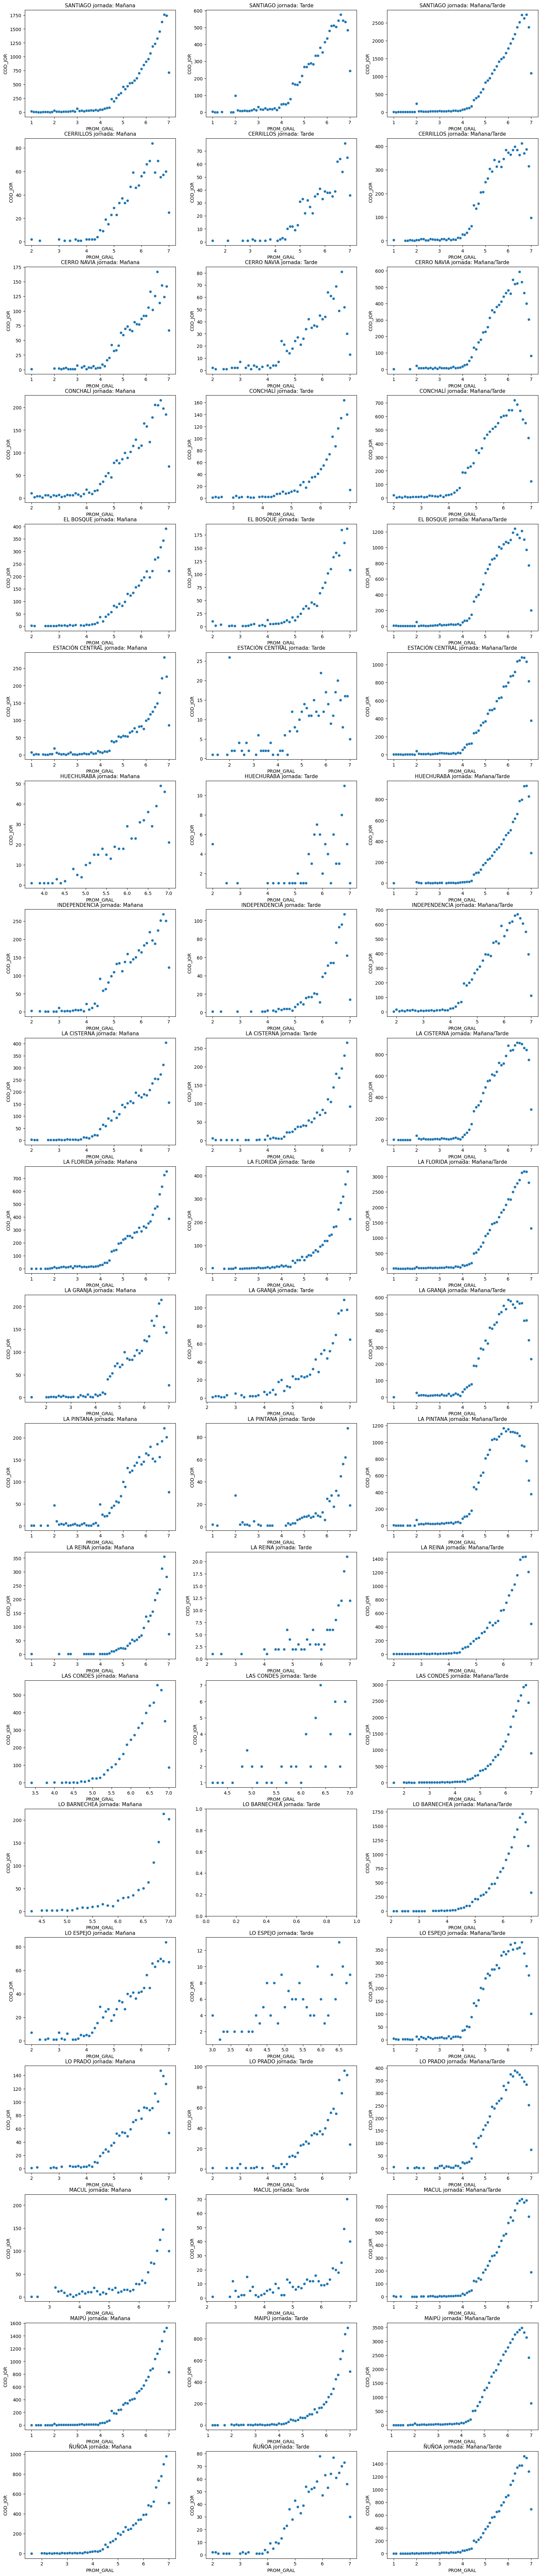

In [25]:
fig, ax = plt.subplots(20, 3, figsize=(20, 100))
ax = ax.flatten()
largo = len(codigos)
axis = 0
df_plot = comunas
for k in range(largo):
    plot = df_plot[(df_plot['COD_COM_RBD'] == codigos[k])] # seleccionamos la comuna
    for j in range(1,4):
        try:
            plot_final = plot[(df_plot['COD_JOR'] == j)] # elegimos la jornada
            plot_final = plot_final.groupby('PROM_GRAL').count()
            axes = sns.scatterplot(data=plot_final, x='PROM_GRAL', y='COD_JOR',ax=ax[axis], legend=True)
            if j == 1:
                axes.set_title(f"{plot['NOM_COM_RBD'].iloc[0]} jornada: Mañana", fontsize=11)
            elif j == 2:
                axes.set_title(f"{plot['NOM_COM_RBD'].iloc[0]} jornada: Tarde", fontsize=11)
            else:
                axes.set_title(f"{plot['NOM_COM_RBD'].iloc[0]} jornada: Mañana/Tarde", fontsize=11)

            axis += 1
        except:
            pass
plt.show()

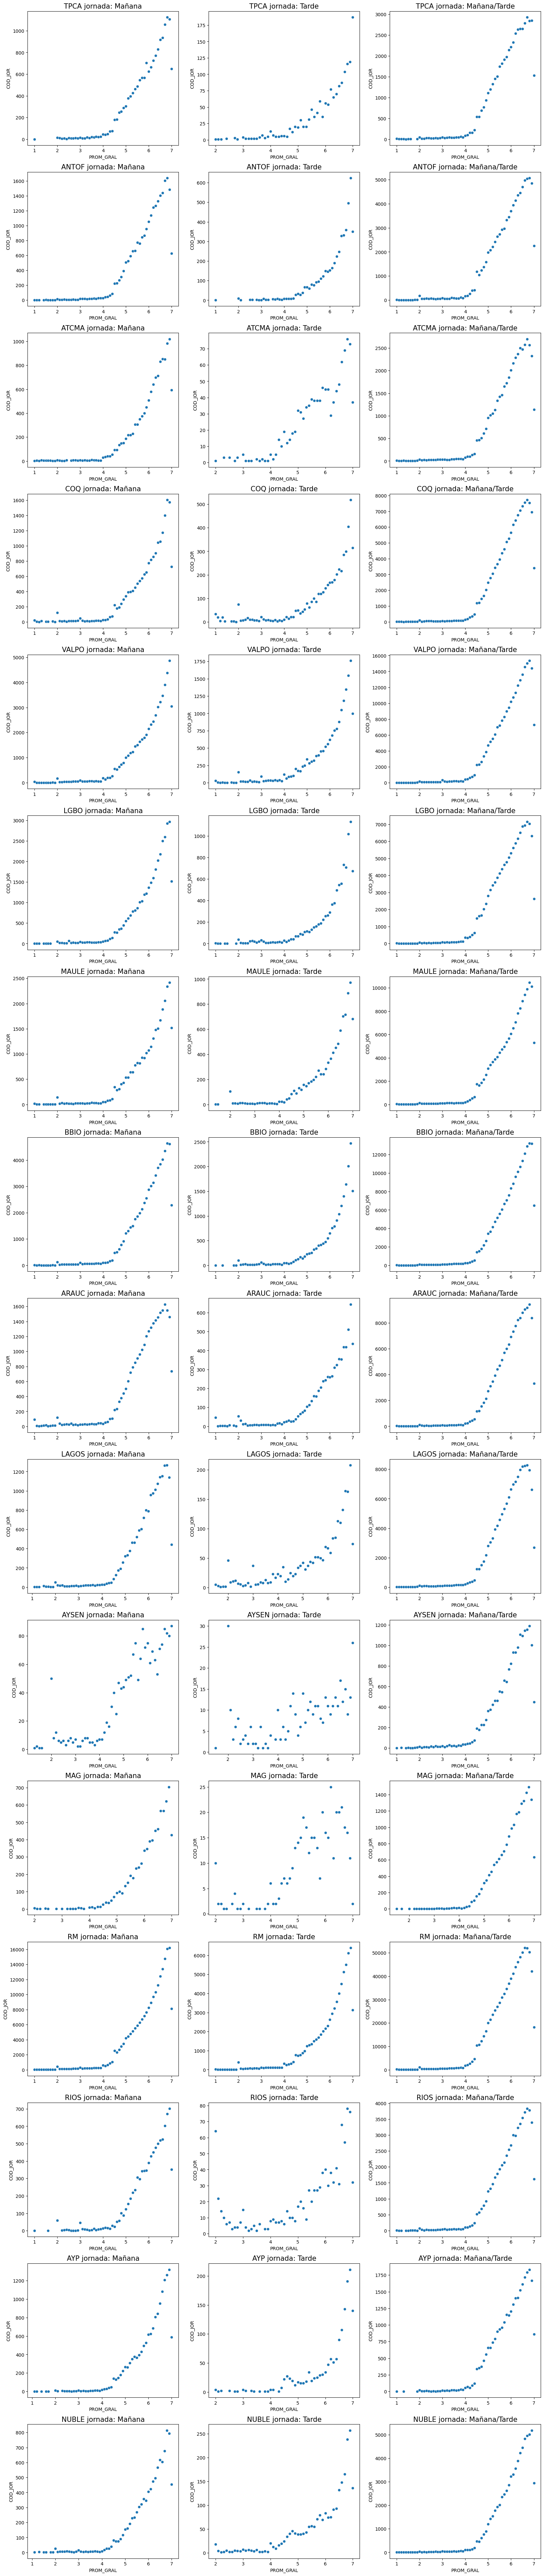

In [26]:
fig, ax = plt.subplots(16, 3, figsize=(20, 100))
ax = ax.flatten()
largo = len(codigos)
axis = 0
df_plot = regiones
for k in range(1,17):
    plot = df_plot[(df_plot['COD_REG_RBD'] == k)] # seleccionamos la comuna
    for j in range(1,4):
        try:
            plot_final = plot[(df_plot['COD_JOR'] == j)] # elegimos la jornada
            plot_final = plot_final.groupby('PROM_GRAL').count()
            axes = sns.scatterplot(data=plot_final, x='PROM_GRAL', y='COD_JOR',ax=ax[axis], legend=True)
            if j == 1:
                axes.set_title(f"{plot['NOM_REG_RBD_A'].iloc[0]} jornada: Mañana", fontsize=15)
            elif j == 2:
                axes.set_title(f"{plot['NOM_REG_RBD_A'].iloc[0]} jornada: Tarde", fontsize=15)
            else:
                axes.set_title(f"{plot['NOM_REG_RBD_A'].iloc[0]} jornada: Mañana/Tarde", fontsize=15)
            axis += 1
        except:
            pass

plt.show()

Se observa que existe un deficit en el rendimiento estudiantil en función de la jornada escolar, si bien, la cantidad de estudiantes varía según el caso, sin embargo, nos interesa que los estudiantes rindan bien. Por lo tanto, es un caso de estudio el problema de la jornada en la influencia del rendimiento escolar para regiones/comunas en especifico. Pensamos que la palabra clave aquí es "fortalecer", debido a que se busca un mejor rendimiento en estos casos.

##### A continuación, estudiaremos la distribucion escolar en Chile 

In [27]:
datos = pd.read_csv("20220617_NEM_PERCENTILES_JOVENES_2021_20220530_PUBL.csv", sep=";")

In [28]:
datos["RBD"] = datos["RBD"].astype("category")
datos["NEM"] = datos["NEM"].str.replace(",",".")
datos["NEM"] = datos["NEM"].astype(np.float64)


In [29]:
agrupacion_promedios = datos.groupby(by = "RBD").mean().reset_index()

In [30]:
directorio = pd.read_csv("Directorio_Oficial_EE_2021.csv", sep=";")

In [31]:
directorio = directorio[directorio["NOM_RBD"].str.contains("JARDIN+|SALA CUNA+", regex=True) == False]

In [32]:
directorio["LONGITUD"] = directorio["LONGITUD"].replace(" ", np.nan)
directorio["LATITUD"] = directorio["LATITUD"].replace(" ", np.nan)
directorio.dropna()
directorio["LONGITUD"] = directorio["LONGITUD"].str.replace(",",".").astype(np.float64)
directorio["LATITUD"] = directorio["LATITUD"].str.replace(",",".").astype(np.float64)


In [33]:
localizaciones = gpd.GeoDataFrame(directorio, geometry= gpd.points_from_xy(directorio["LONGITUD"], directorio["LATITUD"]), crs=4326)

In [34]:
conjunto = localizaciones.merge(agrupacion_promedios, how = "left", on = "RBD")

In [35]:
datos_compacto_2021 = conjunto[['AGNO', 'RBD', 'NOM_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', "COD_DEPE2", 'NEM', 'geometry']]

In [36]:
datos_compacto_2021 = datos_compacto_2021[datos_compacto_2021["geometry"] != None]


Text(0.5, 1.0, 'Grafica de distribución de escuelas en Chile')

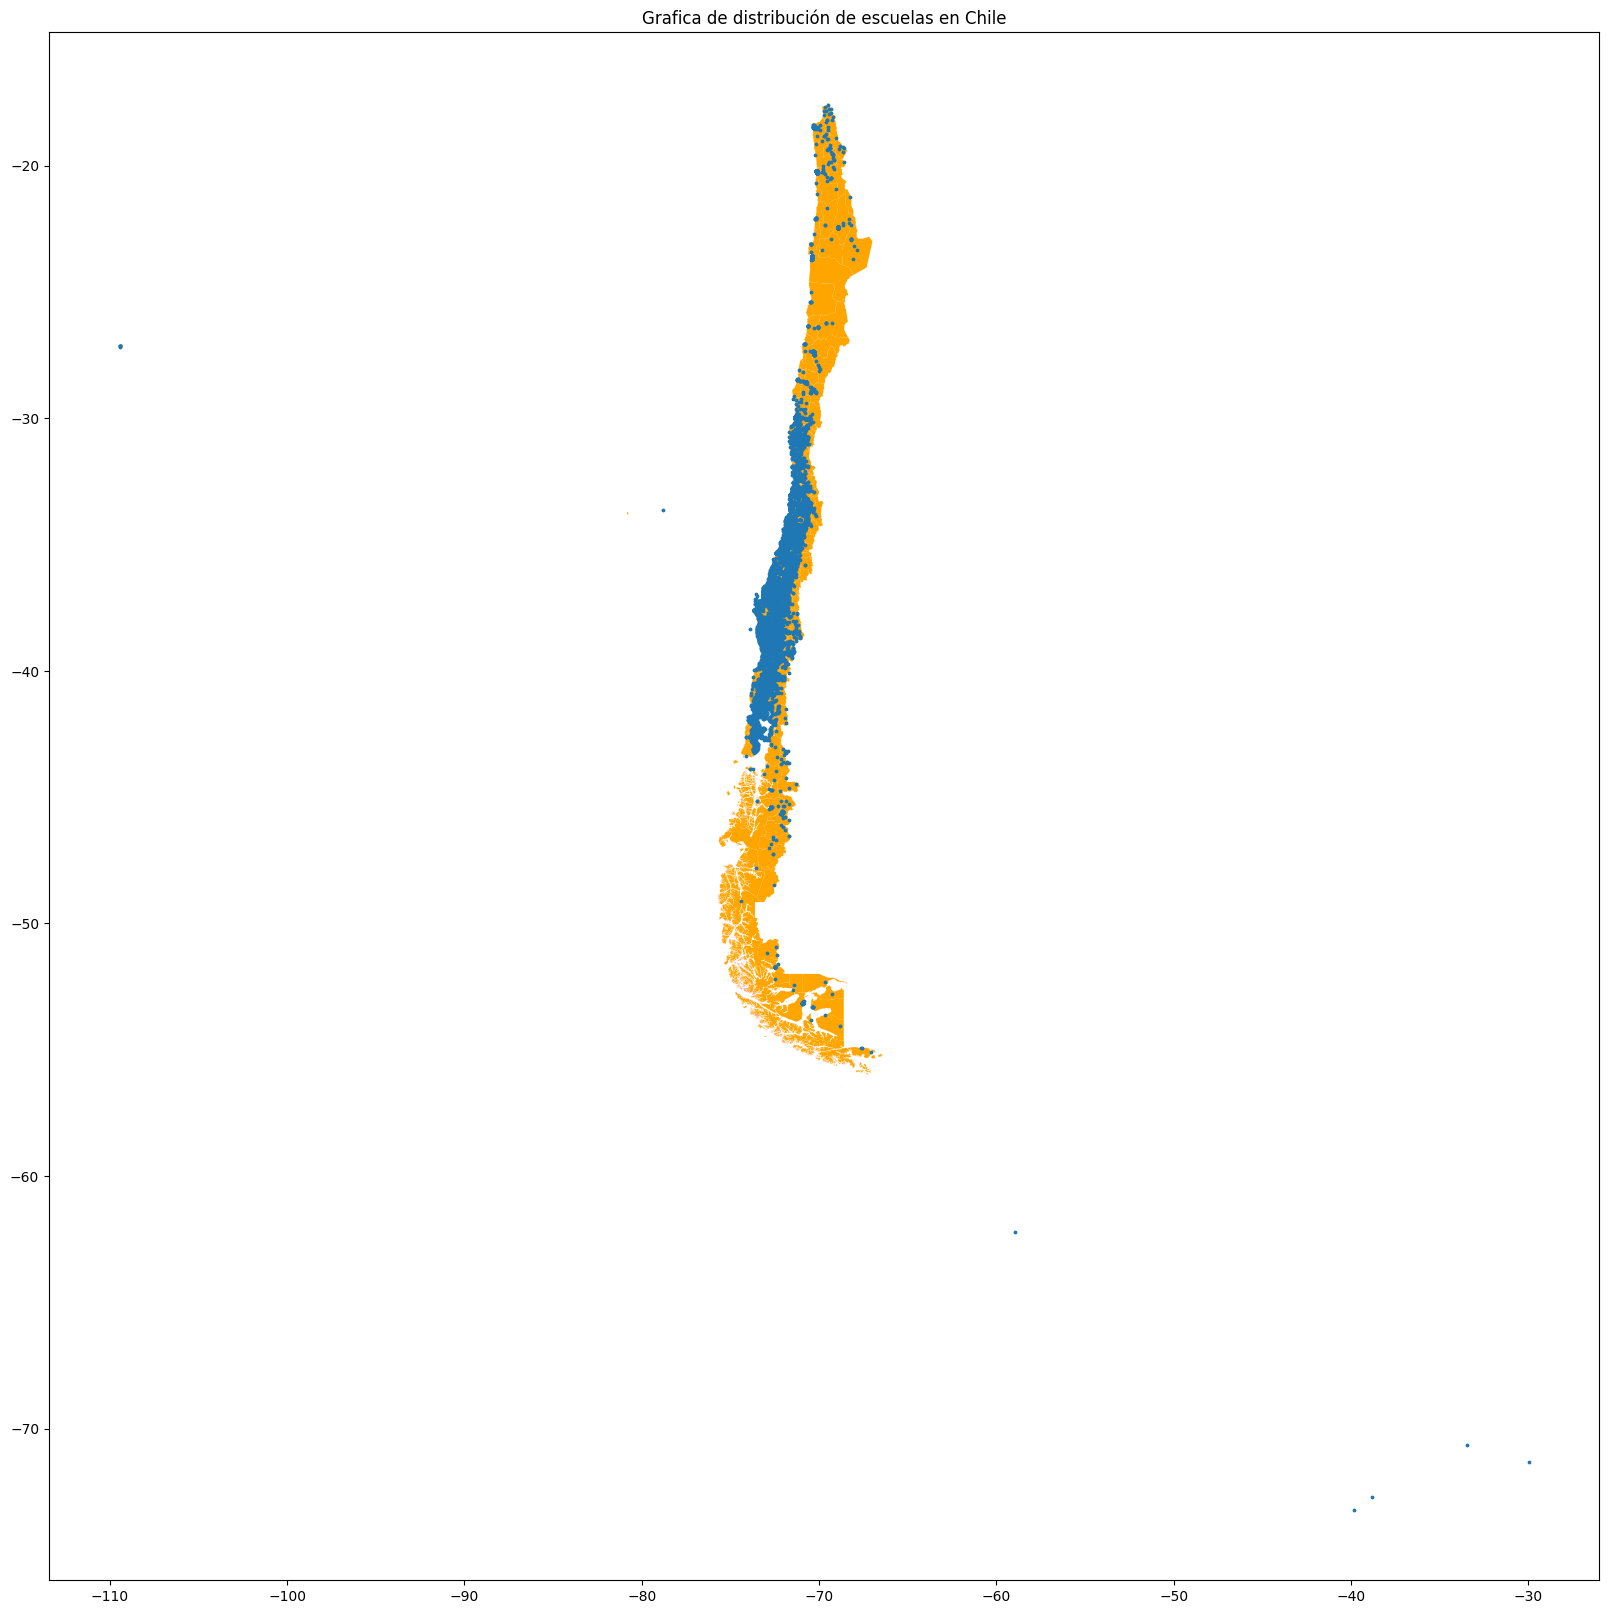

In [38]:
ruta_cartografia = path.join("DivisionPoliticoAdministrativa2020", "COMUNA", "COMUNAS_2020.shp")
comunas = gpd.read_file(ruta_cartografia).to_crs(4326)
# y ploteamos los datos del geodataframe
plot_mapa = comunas.plot(color = "orange", figsize=(20, 50))
datos_compacto_2021.plot(ax = plot_mapa, markersize=3)
plot_mapa.set_title("Grafica de distribución de escuelas en Chile")

In [39]:
geometry = datos_compacto_2021[["RBD", "NOM_RBD", "geometry"]]

In [40]:
datos_compacto_2021.drop("geometry", axis = 1, inplace=True)

In [41]:
subencion = pd.read_csv("20220509_Detalle Subvenciones 2021_20220413.csv", sep=";", encoding="ISO-8859-1")

In [42]:
subencion = subencion.groupby("NOM_RBD").mean().reset_index()
subencion.drop(["AGNO", "COD_DEPE2", "COD_REG_RBD", "COD_PRO_RBD", "COD_COM_RBD"], axis = 1, inplace = True)

In [43]:
subencion["RBD"] = subencion["RBD"].astype(np.int64)

In [44]:
ingreso = pd.read_csv("Ingresos_medios_2010-2021.csv", sep=",")

In [45]:
ingreso = ingreso[ingreso["agno"] == 2021]

In [46]:
ingreso = ingreso[ingreso["agno"] == 2021]

In [47]:
ingreso.rename(columns={"region":"COD_REG_RBD"}, inplace = True)

In [48]:
ingreso = ingreso[["COD_REG_RBD", "ingre_medio"]]

In [49]:
resumen_docente = pd.read_csv("Dotacion_docente_2021.csv", sep=";")[["RBD", "NOM_RBD", "DC_TOT"]]

In [50]:
evaluacion = pd.read_csv("20201104_SNED_2020_2021.csv", sep=";")[["RBD", "NOM_RBD", "EFECTIVR", "MEJORAR", "IGUALDR"]]

In [51]:
evaluacion.replace(" ", 0, inplace=True)

In [52]:
evaluacion["EFECTIVR"]= evaluacion["EFECTIVR"].str.replace(",",".").astype(np.float64)
evaluacion["MEJORAR"] = evaluacion["MEJORAR"].str.replace(",",".").astype(np.float64)
evaluacion["IGUALDR"]= evaluacion["IGUALDR"].str.replace(",",".").astype(np.float64)

##### Agregamos los datos ajustados

In [53]:
datos_compacto_2021 = datos_compacto_2021.merge(subencion, how="left", on = ["RBD", "NOM_RBD"])

In [54]:
datos_compacto_2021 = datos_compacto_2021.merge(ingreso, how="left", on = "COD_REG_RBD")

In [55]:
datos_compacto_2021 = datos_compacto_2021.merge(resumen_docente, how="left", on = ["RBD", "NOM_RBD"])

In [56]:
datos_compacto_2021 = datos_compacto_2021.merge(evaluacion, how="left", on = ["RBD", "NOM_RBD"])

###### Limpieza de datos para el cluster kmeans

In [57]:
datos_compacto_2021 = datos_compacto_2021.dropna()

In [58]:
datos_compacto_2021 = datos_compacto_2021[['AGNO', 'RBD', 'NOM_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPE2', 'NEM', "subv_normal", "ingre_medio", "DC_TOT", "EFECTIVR", "MEJORAR", "IGUALDR"]]

In [59]:
scaler = StandardScaler()
data_sc = scaler.fit_transform(datos_compacto_2021[["AGNO", "COD_DEPE2", "NEM", "subv_normal", "ingre_medio", "DC_TOT", "EFECTIVR", "MEJORAR", "IGUALDR"]])
data_sc

array([[ 0.        ,  3.60672325, -1.21043745, ..., -1.76859159,
         0.22618629, -1.56164603],
       [ 0.        ,  3.60672325,  1.58920348, ...,  0.4447285 ,
         0.22618629,  0.6931764 ],
       [ 0.        ,  3.60672325,  1.74624716, ...,  0.61641518,
         0.22618629,  0.59000204],
       ...,
       [ 0.        ,  0.17554611, -0.57587581, ..., -0.43055254,
        -8.4310098 , -0.18901465],
       [ 0.        ,  0.17554611, -1.30996155, ..., -0.79779742,
         0.22618629,  0.1638244 ],
       [ 0.        ,  0.17554611, -3.05341521, ...,  0.38103614,
         0.22618629,  0.2482032 ]])

In [60]:
inertia=[]
kmax=20
for i in range(1,kmax):

    kmeans = KMeans(n_clusters=i,n_init=10)
    kncl= kmeans.fit(data_sc)

    print(i,kncl.inertia_)
    inertia.append(kncl.inertia_)

1 17095.999999999996
2 13847.285137327834
3 12206.614601512236
4 10657.099323522361
5 9123.068658465685
6 8122.690718087562
7 7138.474029349141
8 6507.919916493273
9 6133.385014711893
10 5817.536226026741
11 5541.33064656994
12 5302.804516984409
13 5081.650919386146
14 4870.543473442464
15 4729.99654243104
16 4575.1381137613125
17 4480.754225486179
18 4359.632713941286
19 4232.5652390409405


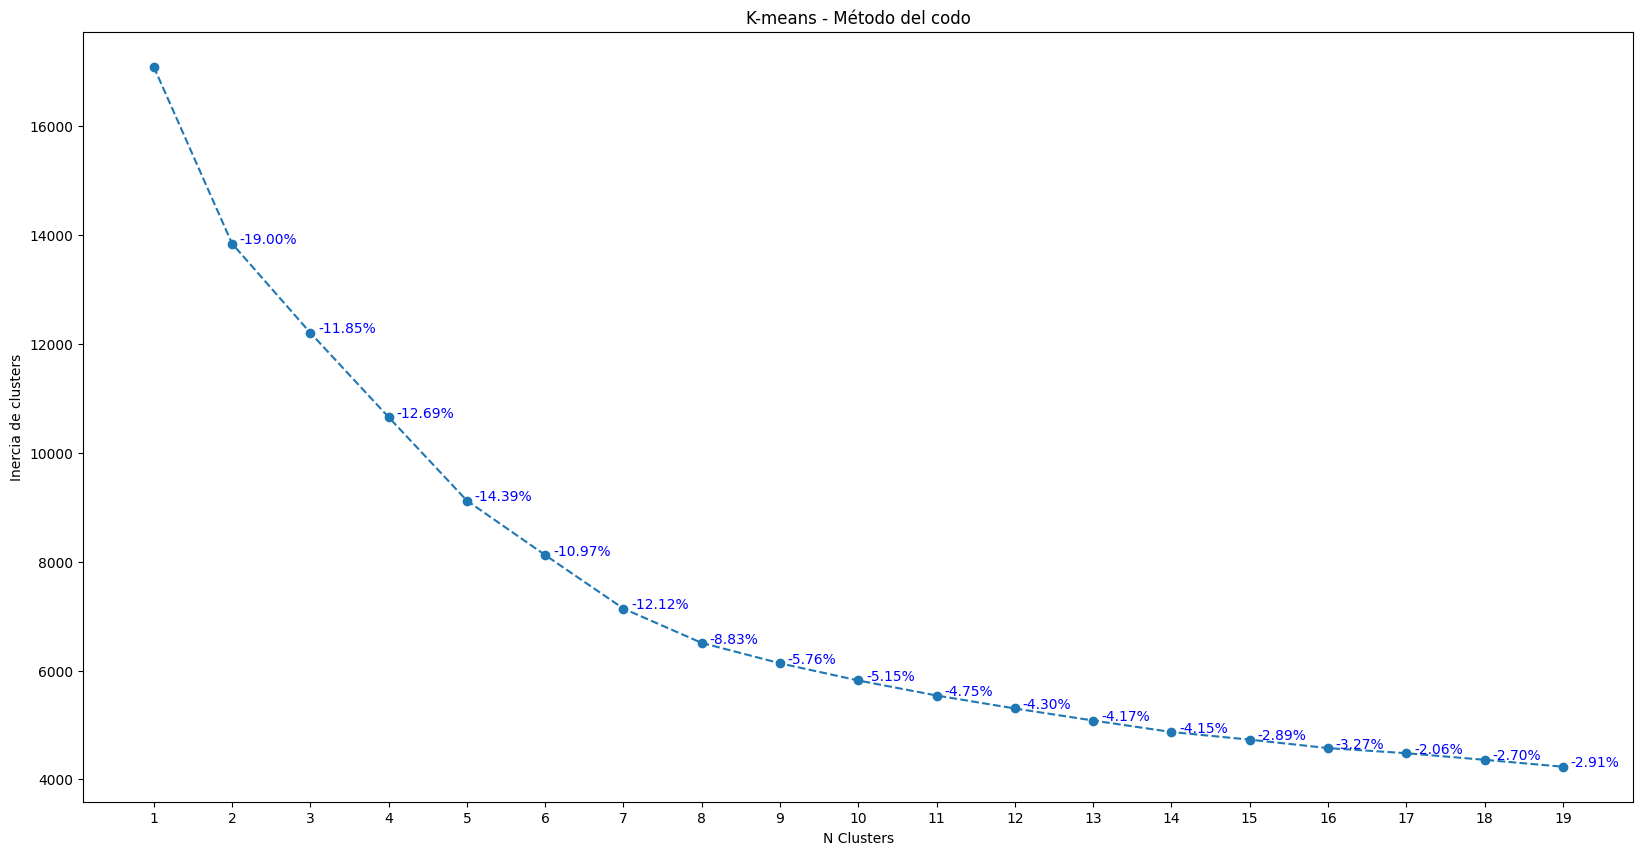

In [61]:
f, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(range(1,kmax),inertia,marker='o',ls='--')
ax.set_xlabel('N Clusters')
ax.set_ylabel('Inercia de clusters')
ax.set_title('K-means - Método del codo')

for i in range(1,len(inertia)):
    delta=(-inertia[i-1]+inertia[i])/inertia[i-1]*100
    ax.text(i+1.1,inertia[i],'%.2f'%delta+'%',color='b')
ax.set_xticks(range(1,kmax))

plt.show()

In [62]:
k=7

# Inicializamos la instancia  KMeans 
kmeans = KMeans(n_clusters=k,random_state=0)


# Correr el algoritmo sobre el conjunto de variable normalizadas
kcls = kmeans.fit(data_sc)


In [63]:
datos_compacto_2021['kcls_labels'] = kcls.labels_

In [64]:
centers = kcls.cluster_centers_
centers_i = scaler.inverse_transform(centers)

centers_i

array([[2.02100000e+03, 5.00000000e+00, 5.67674526e+00, 6.40535142e+07,
        6.16853659e+05, 4.78240741e+01, 3.36685885e+01, 9.98765432e+01,
        9.08350770e+01],
       [2.02100000e+03, 1.88316151e+00, 6.05041723e+00, 7.25190142e+07,
        6.34168179e+05, 4.45412371e+01, 5.26132638e+01, 9.98739977e+01,
        9.39352075e+01],
       [2.02100000e+03, 1.71428571e+00, 5.74248848e+00, 7.54197130e+07,
        6.51870462e+05, 4.73928571e+01, 3.93960022e+01, 9.82142857e+01,
        6.37565235e+01],
       [2.02100000e+03, 1.75593220e+00, 5.85126687e+00, 1.64467733e+08,
        6.89497804e+05, 8.78677966e+01, 4.79801636e+01, 9.98983051e+01,
        9.31317099e+01],
       [2.02100000e+03, 1.65075922e+00, 5.64180086e+00, 6.09929959e+07,
        7.79132492e+05, 4.04598698e+01, 3.65684634e+01, 9.98843095e+01,
        9.06692053e+01],
       [2.02100000e+03, 1.42833052e+00, 5.66719675e+00, 5.15355033e+07,
        5.70397726e+05, 3.84620573e+01, 3.51176880e+01, 9.98257448e+01,
        9.1

In [65]:
datos_compacto_2021 = datos_compacto_2021.merge(geometry, on = ["RBD", "NOM_RBD"])


In [66]:
datos_compacto_2021 = gpd.GeoDataFrame(datos_compacto_2021)

Text(0.5, 1.0, 'Grafica de distribución de escuelas en Chile')

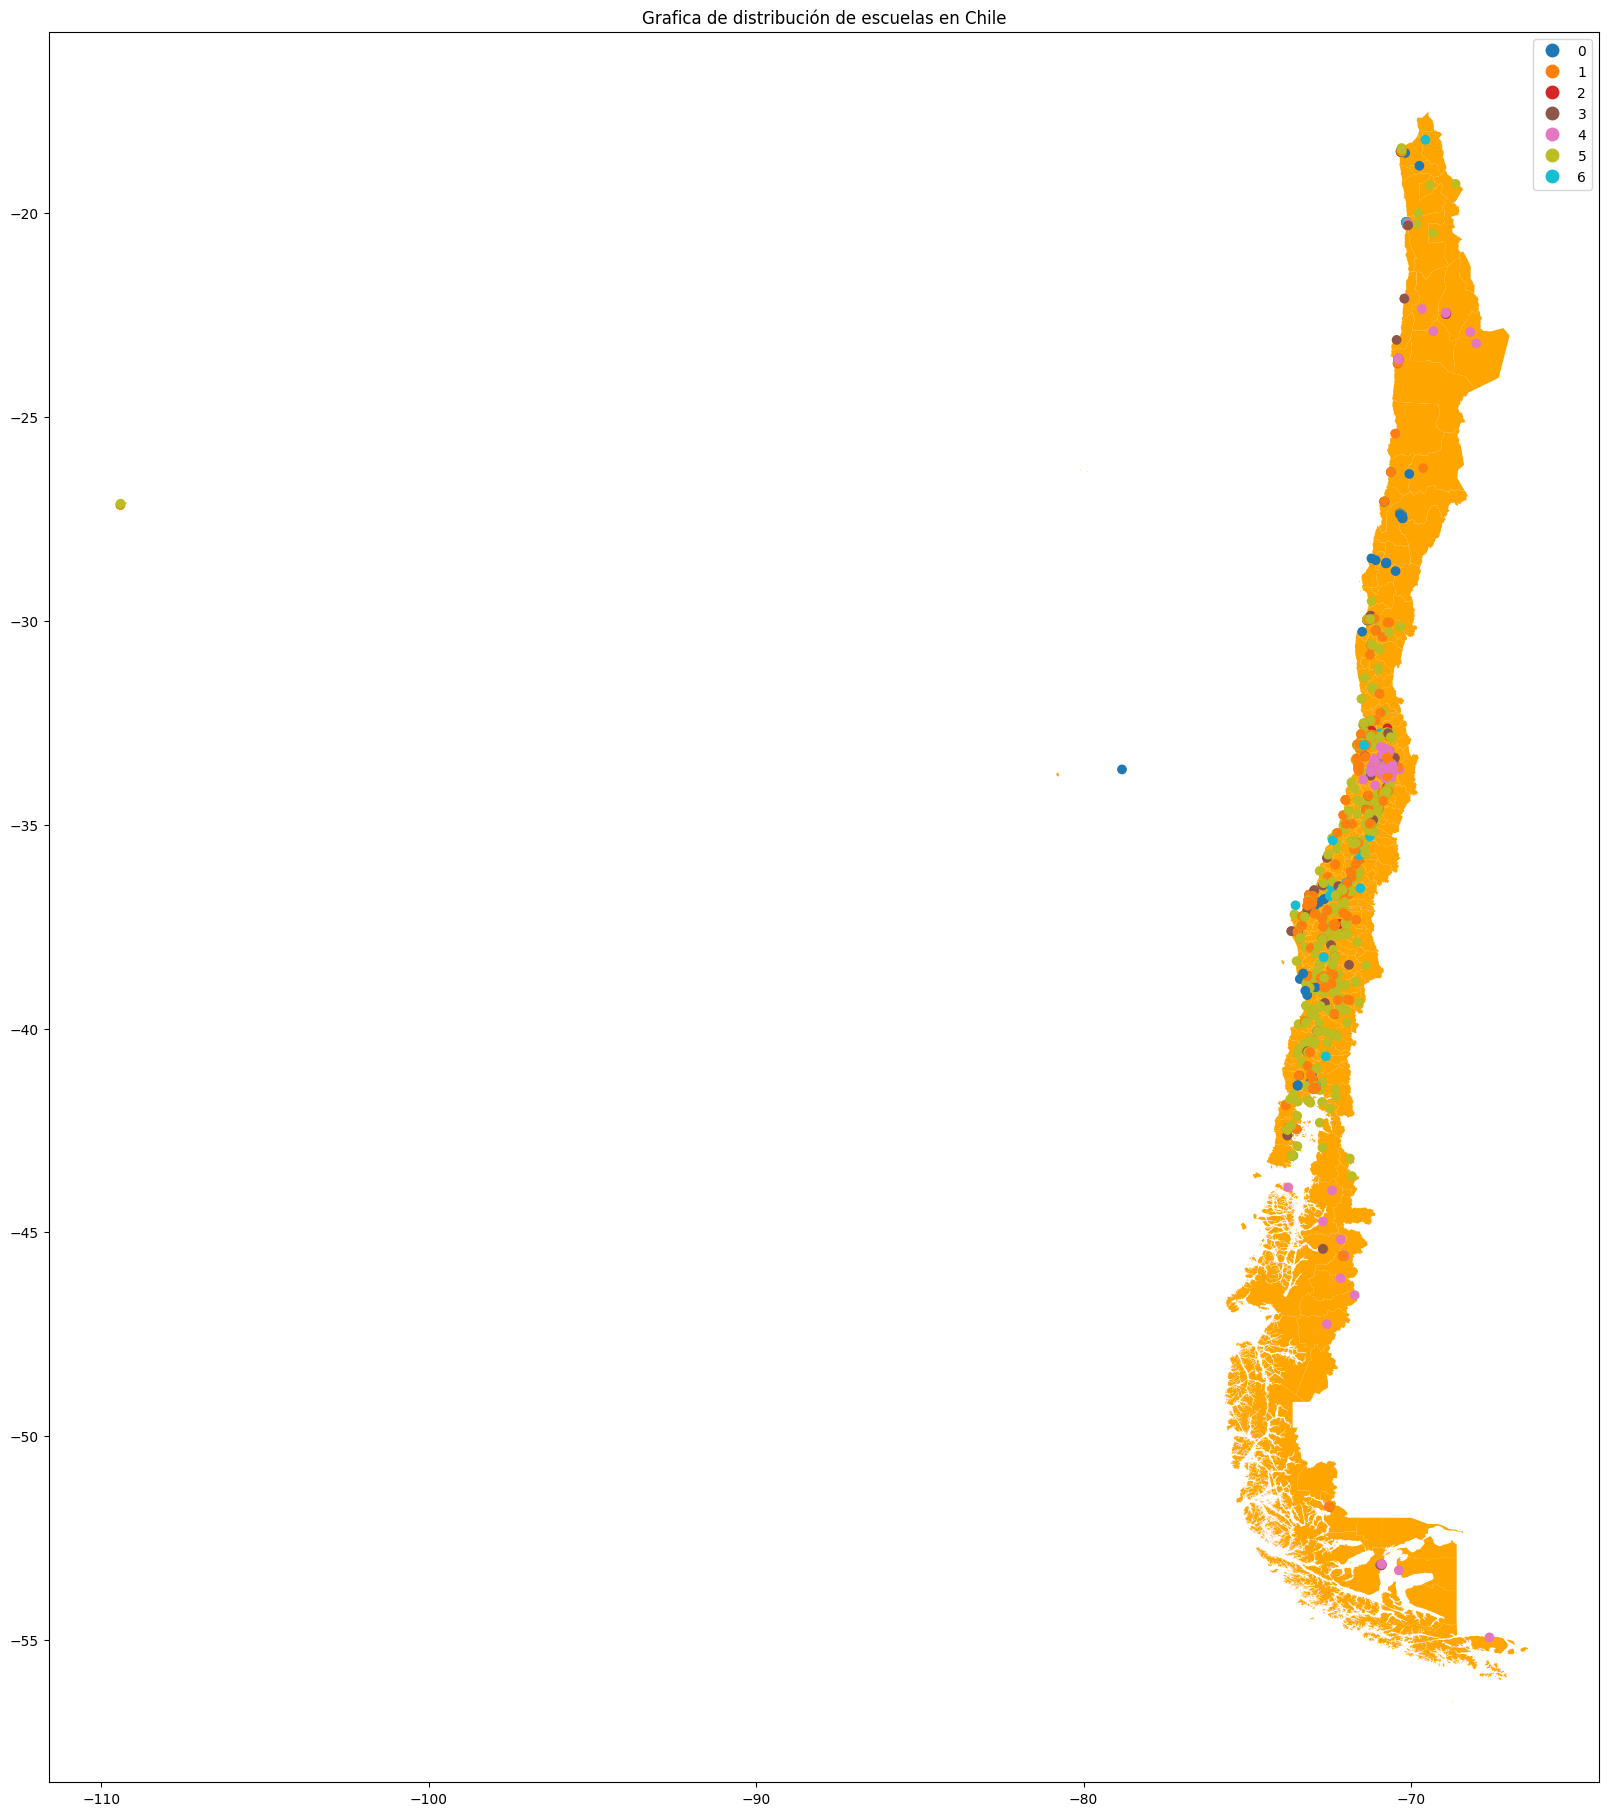

In [67]:
ruta_cartografia = path.join("DivisionPoliticoAdministrativa2020", "COMUNA", "COMUNAS_2020.shp")
comunas = gpd.read_file(ruta_cartografia).to_crs(4326)
# y ploteamos los datos del geodataframe
plot_mapa = comunas.plot(color = "orange", figsize=(20, 50))
datos_compacto_2021.plot(ax = plot_mapa, column = "kcls_labels", categorical = True, legend = True)
plot_mapa.set_title("Grafica de distribución de escuelas en Chile")



La subencion del colegio no necesariamente influye en el nem, como tambien la cantidad de docentes. Por lo tanto, se requiere información más especifica para hallar correlaciones claras.

##### Obtenemos los promedios de los cluster

In [68]:
values = datos_compacto_2021.groupby(by = "kcls_labels").mean().sort_values(by="NEM")[["AGNO", "COD_DEPE2", "NEM", "subv_normal", "ingre_medio", "DC_TOT", "EFECTIVR", "MEJORAR", "IGUALDR"]]
values

AGNO  COD_DEPE2       NEM   subv_normal    ingre_medio  \
kcls_labels                                                             
4            2021.0   1.650000  5.641046  6.081395e+07  779129.619721   
5            2021.0   1.428331  5.667197  5.153550e+07  570397.726161   
0            2021.0   5.000000  5.676745  6.405351e+07  616853.658945   
2            2021.0   1.714286  5.742488  7.541971e+07  651870.461616   
6            2021.0   1.942857  5.773169  6.802887e+07  618522.723962   
3            2021.0   1.756757  5.851732  1.643964e+08  689805.088003   
1            2021.0   1.883162  6.050417  7.251901e+07  634168.179144   

                DC_TOT   EFECTIVR    MEJORAR    IGUALDR  
kcls_labels                                              
4            40.408696  36.586729  99.884058  90.671032  
5            38.462057  35.117688  99.825745  91.457801  
0            47.824074  33.668589  99.876543  90.835077  
2            47.392857  39.396002  98.214286  63.756524  
6            44.571429  41.520407  88.666667  91.907570  
3            87.787162  47.913225  99.898649  93.120551  
1            44.541237  52.613264  99.873998  93.935207

##### Ahora realizaremos un análisis sobre el ingreso a universidades con 7 años de acreditación en las comunas de Santiago.

In [69]:
ruta_comunas = path.join("DivisionPoliticoAdministrativa2020", "COMUNA", "COMUNAS_2020.shp")
comunas = gpd.read_file(ruta_comunas)
comunas['COMUNA'] = comunas['COMUNA'].astype('object')
#https://stackoverflow.com/questions/39512002/convert-whole-dataframe-from-lower-case-to-upper-case-with-pandas
comunas['COMUNA'] = comunas['COMUNA'].str.upper()
comunas = comunas.set_index('COMUNA')
comunas

CUT_REG CUT_PROV CUT_COM  \
COMUNA                                         
IQUIQUE                  01      011   01101   
ALTO HOSPICIO            01      011   01107   
POZO ALMONTE             01      014   01401   
CAMIÑA                   01      014   01402   
COLCHANE                 01      014   01403   
...                     ...      ...     ...   
HUALPÉN                  08      081   08112   
SAN PEDRO DE LA PAZ      08      081   08108   
HUALQUI                  08      081   08105   
RÍO VERDE                12      121   12103   
CONCÓN                   05      051   05103   

                                                   REGION   PROVINCIA  \
COMUNA                                                                  
IQUIQUE                                          Tarapacá     Iquique   
ALTO HOSPICIO                                    Tarapacá     Iquique   
POZO ALMONTE                                     Tarapacá   Tamarugal   
CAMIÑA                                           Tarapacá   Tamarugal   
COLCHANE                                         Tarapacá   Tamarugal   
...                                                   ...         ...   
HUALPÉN                                            Biobío  Concepción   
SAN PEDRO DE LA PAZ                                Biobío  Concepción   
HUALQUI                                            Biobío  Concepción   
RÍO VERDE            Magallanes y de la Antártica Chilena  Magallanes   
CONCÓN                                         Valparaíso  Valparaíso   

                     SUPERFICIE  \
COMUNA                            
IQUIQUE                 2289.53   
ALTO HOSPICIO            571.19   
POZO ALMONTE           13765.80   
CAMIÑA                  2199.83   
COLCHANE                4007.84   
...                         ...   
HUALPÉN                   53.77   
SAN PEDRO DE LA PAZ      112.86   
HUALQUI                  535.85   
RÍO VERDE               9147.57   
CONCÓN                    76.93   

                                                              geometry  
COMUNA                                                                  
IQUIQUE              MULTIPOLYGON (((-70.11528 -21.17792, -70.11540...  
ALTO HOSPICIO        POLYGON ((-69.92603 -20.25000, -69.96762 -20.3...  
POZO ALMONTE         POLYGON ((-68.99185 -19.92108, -68.98991 -19.9...  
CAMIÑA               POLYGON ((-69.39521 -19.06188, -69.39385 -19.0...  
COLCHANE             POLYGON ((-68.65146 -19.77181, -68.65148 -19.7...  
...                                                                ...  
HUALPÉN              MULTIPOLYGON (((-73.17486 -36.81466, -73.17491...  
SAN PEDRO DE LA PAZ  POLYGON ((-73.09146 -36.82367, -73.08958 -36.8...  
HUALQUI              POLYGON ((-72.92506 -36.89303, -72.92471 -36.8...  
RÍO VERDE            MULTIPOLYGON (((-72.49585 -53.54084, -72.49615...  
CONCÓN               POLYGON ((-71.44276 -33.00200, -71.44282 -33.0...  

[345 rows x 7 columns]

In [71]:
rendimiento_2021 = pd.read_csv('promedios.zip',compression='zip', sep=';')
superior_2022 = pd.read_csv('superior_2022.csv', delimiter= ';')

In [72]:
rendimiento_2021 = rendimiento_2021.dropna(subset = ['MRUN'])
rendimiento_2021['EDAD_ALU'] = rendimiento_2021['EDAD_ALU'].replace(' ', np.nan)
rendimiento_2021 = rendimiento_2021.dropna(subset = ['EDAD_ALU'])
rendimiento_2021['EDAD_ALU'] = rendimiento_2021['EDAD_ALU'].astype(np.int64)
rendimiento_2021['EDAD_ALU'] = rendimiento_2021['EDAD_ALU'].astype(np.int64)
rendimiento_2021 = rendimiento_2021[rendimiento_2021['EDAD_ALU'] <= 17]
rendimiento_2021 = rendimiento_2021[['MRUN', 'AGNO', 'COD_REG_RBD', 'COD_PRO_RBD', 'NOM_COM_RBD']]
rendimiento_2021

MRUN  AGNO  COD_REG_RBD  COD_PRO_RBD  NOM_COM_RBD
12         761596  2021           15          151        ARICA
13         861896  2021           15          151        ARICA
14        1827644  2021           15          151        ARICA
15        2370806  2021           15          151        ARICA
16        4170305  2021           15          151        ARICA
...           ...   ...          ...          ...          ...
3237038  19559102  2021            8           83  LOS ÁNGELES
3237039  10334694  2021            8           83  LOS ÁNGELES
3237040  13127779  2021            8           83  LOS ÁNGELES
3237041   4362526  2021            8           83  LOS ÁNGELES
3237042   5721795  2021            8           83  LOS ÁNGELES

[2989290 rows x 5 columns]

In [73]:
superior_2022 = superior_2022.rename(columns={'mrun' : 'MRUN'})
superior_2022 = superior_2022.dropna(subset = ['MRUN'])
superior_2022 = superior_2022[['MRUN', 'codigo_unico',  'cod_inst', 'nomb_inst', 'cod_carrera', 'nomb_carrera', 'region_sede', 'provincia_sede', 'comuna_sede', 'valor_matricula', 'valor_arancel', 'codigo_demre', 'acre_inst_anio']]
superior_2022


MRUN    codigo_unico  cod_inst  \
0              26.0     I45S2C4J1V1        45   
1              35.0    I31S2C41J1V1        31   
2              43.0   I70S1C900J1V1        70   
3              51.0  I143S27C34J2V1       143   
4              98.0   I111S22C8J1V1       111   
...             ...             ...       ...   
1300607  27082979.0   I80S1C342J2V1        80   
1300608  27082980.0    I23S2C21J5V1        23   
1300609  27082981.0    I2S1C397J2V1         2   
1300610  27082982.0   I90S1C592J1V1        90   
1300611  27082983.0   I86S1C773J4V1        86   

                                        nomb_inst  cod_carrera  \
0                      UNIVERSIDAD DEL DESARROLLO            4   
1                   UNIVERSIDAD AUTONOMA DE CHILE           41   
2                            UNIVERSIDAD DE CHILE          900   
3                                         IP AIEP           34   
4                                      IP DUOC UC            8   
...                                           ...          ...   
1300607                   UNIVERSIDAD DE TARAPACA          342   
1300608                 UNIVERSIDAD ADOLFO IBAÑEZ           21   
1300609                  UNIVERSIDAD FINIS TERRAE          397   
1300610              UNIVERSIDAD AUSTRAL DE CHILE          592   
1300611  PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE          773   

                                              nomb_carrera  \
0                                                  DERECHO   
1                                               ENFERMERIA   
2              DOCTORADO EN TERRITORIO, ESPACIO Y SOCIEDAD   
3                                    TECNICO EN ENFERMERIA   
4                                              GASTRONOMIA   
...                                                    ...   
1300607           INGENIERIA EN ADMINISTRACION DE EMPRESAS   
1300608  MAGISTER EN ADMINISTRACION DE EMPRESAS (EXECUT...   
1300609  DIPLOMADO EN NUTRICION CLINICA DEL ADULTO Y AD...   
1300610  DIPLOMADO EN FOMENTO LECTOR Y LITERATURA PARA ...   
1300611  DIPLOMADO EN DOCENCIA UNIVERSITARIA PARA PROFE...   

                region_sede provincia_sede  comuna_sede  valor_matricula  \
0             Metropolitana       SANTIAGO   LAS CONDES             25.0   
1                     Maule          TALCA        TALCA         255000.0   
2             Metropolitana       SANTIAGO     SANTIAGO         157900.0   
3             Metropolitana       SANTIAGO     CONCHALI         200000.0   
4             Metropolitana       SANTIAGO     SANTIAGO         204000.0   
...                     ...            ...          ...              ...   
1300607  Arica y Parinacota          ARICA        ARICA         165000.0   
1300608       Metropolitana       SANTIAGO    PEÑALOLEN             70.0   
1300609       Metropolitana       SANTIAGO  PROVIDENCIA          80000.0   
1300610            Los Ríos       VALDIVIA     VALDIVIA         190000.0   
1300611       Metropolitana       SANTIAGO     SANTIAGO              0.0   

         valor_arancel  codigo_demre  acre_inst_anio  
0                232.0         44006             6.0  
1            3924000.0         49201             5.0  
2            3668000.0             0             7.0  
3            2470000.0             0             5.0  
4            2650000.0             0             7.0  
...                ...           ...             ...  
1300607      3576000.0             0             5.0  
1300608          533.0             0             6.0  
1300609       950000.0             0             4.0  
1300610      1010000.0             0             6.0  
1300611            0.0             0             7.0  

[1300612 rows x 13 columns]

In [74]:
ingreso = rendimiento_2021.merge(superior_2022, on = 'MRUN')
ingreso = ingreso.rename(columns = {'NOM_COM_RBD' : 'COMUNA'})
ingreso

MRUN  AGNO  COD_REG_RBD  COD_PRO_RBD   COMUNA    codigo_unico  \
0      11469791  2021           15          151    ARICA    I80S1C72J1V3   
1      12008281  2021           15          151    ARICA    I80S1C72J1V3   
2       4854783  2021           15          151    ARICA  I430S2C326J1V1   
3       9318877  2021           15          151    ARICA  I430S2C326J1V1   
4      13322058  2021           15          151    ARICA  I430S2C326J2V1   
...         ...   ...          ...          ...      ...             ...   
77439  11446443  2021            3           31  COPIAPÓ    I91S2C30J1V2   
77440  12907287  2021            3           31  COPIAPÓ    I79S1C56J1V1   
77441  13224855  2021            3           31  COPIAPÓ     I79S1C5J1V1   
77442  18233147  2021            3           31  COPIAPÓ     I79S1C2J1V2   
77443  24897187  2021            3           31  COPIAPÓ   I79S1C144J1V1   

       cod_inst                       nomb_inst  cod_carrera  \
0            80         UNIVERSIDAD DE TARAPACA           72   
1            80         UNIVERSIDAD DE TARAPACA           72   
2           430                      CFT INACAP          326   
3           430                      CFT INACAP          326   
4           430                      CFT INACAP          326   
...         ...                             ...          ...   
77439        91  UNIVERSIDAD CATOLICA DEL NORTE           30   
77440        79          UNIVERSIDAD DE ATACAMA           56   
77441        79          UNIVERSIDAD DE ATACAMA            5   
77442        79          UNIVERSIDAD DE ATACAMA            2   
77443        79          UNIVERSIDAD DE ATACAMA          144   

                                            nomb_carrera         region_sede  \
0                              INGENIERIA CIVIL MECANICA  Arica y Parinacota   
1                              INGENIERIA CIVIL MECANICA  Arica y Parinacota   
2      TECNICO EN MECANICA Y ELECTROMOVILIDAD AUTOMOTRIZ  Arica y Parinacota   
3      TECNICO EN MECANICA Y ELECTROMOVILIDAD AUTOMOTRIZ  Arica y Parinacota   
4      TECNICO EN MECANICA Y ELECTROMOVILIDAD AUTOMOTRIZ  Arica y Parinacota   
...                                                  ...                 ...   
77439                        INGENIERIA CIVIL INDUSTRIAL            Coquimbo   
77440            ENFERMERIA Y LICENCIATURA EN ENFERMERIA             Atacama   
77441                          INGENIERIA CIVIL EN MINAS             Atacama   
77442                                            DERECHO             Atacama   
77443  TECNICO UNIVERSITARIO EN ADMINISTRACION DE EMP...             Atacama   

      provincia_sede comuna_sede  valor_matricula  valor_arancel  \
0              ARICA       ARICA         165000.0      4096000.0   
1              ARICA       ARICA         165000.0      4096000.0   
2              ARICA       ARICA         230000.0      2146000.0   
3              ARICA       ARICA         230000.0      2146000.0   
4              ARICA       ARICA         230000.0      2146000.0   
...              ...         ...              ...            ...   
77439          ELQUI    COQUIMBO         150800.0      4545360.0   
77440        COPIAPO     COPIAPO         139000.0      2986000.0   
77441        COPIAPO     COPIAPO         139000.0      3044000.0   
77442        COPIAPO     COPIAPO         139000.0      3333000.0   
77443        COPIAPO     COPIAPO         139000.0      1812000.0   

       codigo_demre  acre_inst_anio  
0             22076             5.0  
1             22076             5.0  
2                 0             7.0  
3                 0             7.0  
4                 0             7.0  
...             ...             ...  
77439         18093             6.0  
77440         27080             4.0  
77441         27001             4.0  
77442         27040             4.0  
77443             0             4.0  

[77444 rows x 17 columns]

In [75]:
lista_universidades_7 = ['PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE', 'UNIVERSIDAD DE CHILE', 'UNIVERSIDAD DE SANTIAGO DE CHILE']
for universidad in lista_universidades_7:
    ub_colegios_universidad = ingreso[ingreso['nomb_inst'] == universidad]
    alu_por_comuna = ub_colegios_universidad.groupby('COMUNA').count()
    comunas[universidad] = alu_por_comuna['MRUN']
comunas = comunas.replace(np.nan, float(0))
comunas

CUT_REG CUT_PROV CUT_COM  \
COMUNA                                         
IQUIQUE                  01      011   01101   
ALTO HOSPICIO            01      011   01107   
POZO ALMONTE             01      014   01401   
CAMIÑA                   01      014   01402   
COLCHANE                 01      014   01403   
...                     ...      ...     ...   
HUALPÉN                  08      081   08112   
SAN PEDRO DE LA PAZ      08      081   08108   
HUALQUI                  08      081   08105   
RÍO VERDE                12      121   12103   
CONCÓN                   05      051   05103   

                                                   REGION   PROVINCIA  \
COMUNA                                                                  
IQUIQUE                                          Tarapacá     Iquique   
ALTO HOSPICIO                                    Tarapacá     Iquique   
POZO ALMONTE                                     Tarapacá   Tamarugal   
CAMIÑA                                           Tarapacá   Tamarugal   
COLCHANE                                         Tarapacá   Tamarugal   
...                                                   ...         ...   
HUALPÉN                                            Biobío  Concepción   
SAN PEDRO DE LA PAZ                                Biobío  Concepción   
HUALQUI                                            Biobío  Concepción   
RÍO VERDE            Magallanes y de la Antártica Chilena  Magallanes   
CONCÓN                                         Valparaíso  Valparaíso   

                     SUPERFICIE  \
COMUNA                            
IQUIQUE                 2289.53   
ALTO HOSPICIO            571.19   
POZO ALMONTE           13765.80   
CAMIÑA                  2199.83   
COLCHANE                4007.84   
...                         ...   
HUALPÉN                   53.77   
SAN PEDRO DE LA PAZ      112.86   
HUALQUI                  535.85   
RÍO VERDE               9147.57   
CONCÓN                    76.93   

                                                              geometry  \
COMUNA                                                                   
IQUIQUE              MULTIPOLYGON (((-70.11528 -21.17792, -70.11540...   
ALTO HOSPICIO        POLYGON ((-69.92603 -20.25000, -69.96762 -20.3...   
POZO ALMONTE         POLYGON ((-68.99185 -19.92108, -68.98991 -19.9...   
CAMIÑA               POLYGON ((-69.39521 -19.06188, -69.39385 -19.0...   
COLCHANE             POLYGON ((-68.65146 -19.77181, -68.65148 -19.7...   
...                                                                ...   
HUALPÉN              MULTIPOLYGON (((-73.17486 -36.81466, -73.17491...   
SAN PEDRO DE LA PAZ  POLYGON ((-73.09146 -36.82367, -73.08958 -36.8...   
HUALQUI              POLYGON ((-72.92506 -36.89303, -72.92471 -36.8...   
RÍO VERDE            MULTIPOLYGON (((-72.49585 -53.54084, -72.49615...   
CONCÓN               POLYGON ((-71.44276 -33.00200, -71.44282 -33.0...   

                     PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE  \
COMUNA                                                          
IQUIQUE                                                  29.0   
ALTO HOSPICIO                                             2.0   
POZO ALMONTE                                              0.0   
CAMIÑA                                                    0.0   
COLCHANE                                                  0.0   
...                                                       ...   
HUALPÉN                                                   5.0   
SAN PEDRO DE LA PAZ                                      15.0   
HUALQUI                                                   0.0   
RÍO VERDE                                                 0.0   
CONCÓN                                                    8.0   

                     UNIVERSIDAD DE CHILE  UNIVERSIDAD DE SANTIAGO DE CHILE  
COMUNA                                                                       
IQUIQUE                 

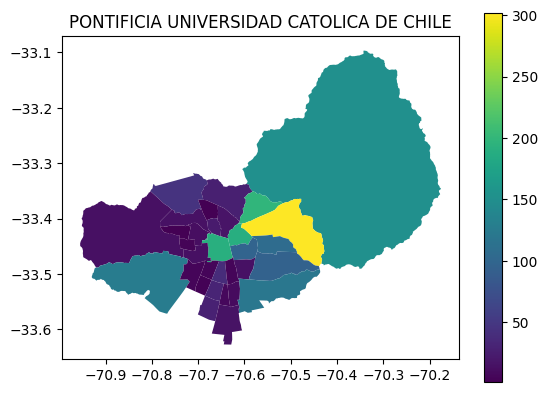

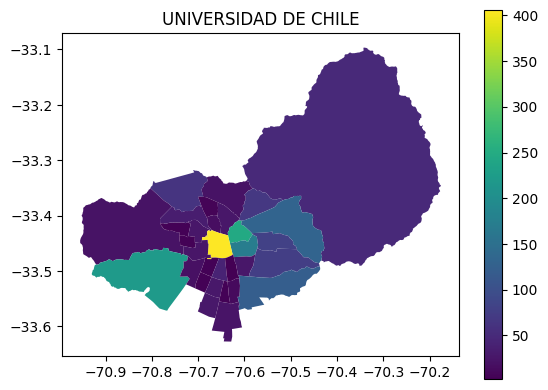

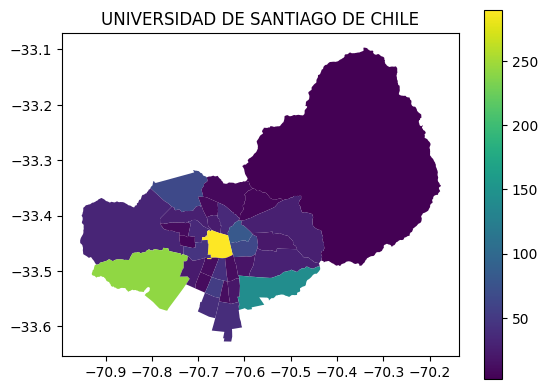

In [76]:
for universidad in lista_universidades_7:
    if universidad != 'UNIVERSIDAD DE CONCEPCION':
        fig, ax = plt.subplots()
        prov_stgo = comunas[comunas['PROVINCIA'] == 'Santiago']
        prov_stgo.plot(column = universidad, legend = True, ax = ax)
        bounds = prov_stgo.geometry.total_bounds
        xlim = ([bounds[0],  bounds[2]])
        ylim = ([bounds[1],  bounds[3]])
        plt.title(universidad)

In [77]:
superior_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300612 entries, 0 to 1300611
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   MRUN             1300612 non-null  float64
 1   codigo_unico     1300612 non-null  object 
 2   cod_inst         1300612 non-null  int64  
 3   nomb_inst        1300612 non-null  object 
 4   cod_carrera      1300612 non-null  int64  
 5   nomb_carrera     1300612 non-null  object 
 6   region_sede      1300612 non-null  object 
 7   provincia_sede   1300612 non-null  object 
 8   comuna_sede      1300612 non-null  object 
 9   valor_matricula  1300612 non-null  float64
 10  valor_arancel    1300612 non-null  float64
 11  codigo_demre     1300612 non-null  int64  
 12  acre_inst_anio   1240310 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 138.9+ MB


#####  A continuacion, observaremos los graficos anteriores en relacion a la matricula escolar.

In [78]:
ub_colegios = pd.read_csv('dir_colegios2022.zip',compression='zip', sep=';')

ub_colegios = ub_colegios[ub_colegios['LONGITUD'] != ' ']
ub_colegios = ub_colegios[ub_colegios['LATITUD'] != ' ']
ub_colegios['LONGITUD'] = ub_colegios['LONGITUD'].str.replace(',', '.')
ub_colegios['LATITUD'] = ub_colegios['LATITUD'].str.replace(',', '.')
ub_colegios = ub_colegios[ub_colegios['PAGO_MENSUAL'] != 'SIN INFORMACION']
ub_colegios['LONGITUD'] = ub_colegios['LONGITUD'].astype(np.float64)
ub_colegios['LATITUD'] = ub_colegios['LATITUD'].astype(np.float64)
ub_colegios['MAT_TOTAL'] = ub_colegios['MAT_TOTAL'].astype(np.float64)
ub_colegios['MATRICULA'] = ub_colegios['MATRICULA'].astype(np.float64)
ub_colegios = ub_colegios.dropna()
ub_colegios = ub_colegios.rename(columns = {'NOM_COM_RBD':'COMUNA'})
ub_colegios = gpd.GeoDataFrame(ub_colegios, geometry=gpd.points_from_xy(ub_colegios['LONGITUD'], ub_colegios['LATITUD']))
ub_colegios

AGNO    RBD  DGV_RBD                                   NOM_RBD MRUN  \
0      2022      1        9                   LICEO POLITECNICO ARICA        
1      2022      2        7                 PARVULARIO LAS ESPIGUITAS        
2      2022      3        5       ESC. PEDRO VICENTE GUTIERREZ TORRES        
3      2022      4        3                 LICEO OCTAVIO PALMA PEREZ        
4      2022      5        1                  JOVINA NARANJO FERNANDEZ        
...     ...    ...      ...                                       ...  ...   
16556  2022  42032        8                           COLEGIO HUELLAS        
16566  2022  42042        5             ESCUELA HOSPITALARIA PUTAENDO        
16569  2022  42048        4  ESCUELA ESPECIAL DE LENGUAJE GRANJERITOS        
16577  2022  42064        6       JARDIN INFANTIL ARCOIRIS  FLORENCIA        
16588  2022  42081        6           ESCUELA HOSPITALARIA SANTA CRUZ        

      RUT_SOSTENEDOR  P_JURIDICA  COD_REG_RBD NOM_REG_RBD_A  COD_PRO_RBD  ...  \
0           62000660           1           15           AYP          151  ...   
1           62000660           1           15           AYP          151  ...   
2           62000660           1           15           AYP          151  ...   
3           62000660           1           15           AYP          151  ...   
4           62000660           1           15           AYP          151  ...   
...              ...         ...          ...           ...          ...  ...   
16556       77257123           1           16         NUBLE          161  ...   
16566       65193679           1            5         VALPO           57  ...   
16569       65119714           1            7         MAULE           71  ...   
16577       77112362           1            5         VALPO           56  ...   
16588       65198651           1            6          LGBO           63  ...   

       ENS_10 ENS_11  MAT_TOTAL MATRICULA  ESTADO_ESTAB  ORI_RELIGIOSA  \
0           0      0      667.0       1.0             1              2   
1           0      0      166.0       1.0             1              2   
2           0      0      376.0       1.0             1              1   
3           0      0     1014.0       1.0             1              1   
4           0      0      771.0       1.0             1              7   
...       ...    ...        ...       ...           ...            ...   
16556       0      0       60.0       1.0             1              1   
16566       0      0        6.0       1.0             1              1   
16569       0      0        0.0       0.0             4              1   
16577       0      0        0.0       0.0             1              1   
16588       0      0        2.0       1.0             1              1   

       ORI_OTRO_GLOSA   PAGO_MATRICULA     PAGO_MENSUAL  \
0                             GRATUITO         GRATUITO   
1                             GRATUITO         GRATUITO   
2                             GRATUITO         GRATUITO   
3                             GRATUITO         GRATUITO   
4          PLURALISTA         GRATUITO         GRATUITO   
...               ...              ...              ...   
16556                  MAS DE $100.000  MAS DE $100.000   
16566                         GRATUITO         GRATUITO   
16569                         GRATUITO         GRATUITO   
16577                  MAS DE $100.000  MAS DE $100.000   
16588                         GRATUITO         GRATUITO   

                          geometry  
0      POINT (-70.29521 -18.48720)  
1      POINT (-70.30276 -18.46986)  
2      POINT (-70.26083 -18.50358)  
3      POINT (-70.30827 -18.47424)  
4      POINT (-70.31345 -18.47690)  
...                            ...  
16556  POINT (-72.04645 -36.56393)  
16566  POINT (-70.68808 -32.61895)  
16569  POINT (-71.15360 -35.15130)  
16577  POINT (-71.61107 -33.61766)  
16588  POINT (-71.35731 -34.63459)  

[12103 rows x 40 columns]

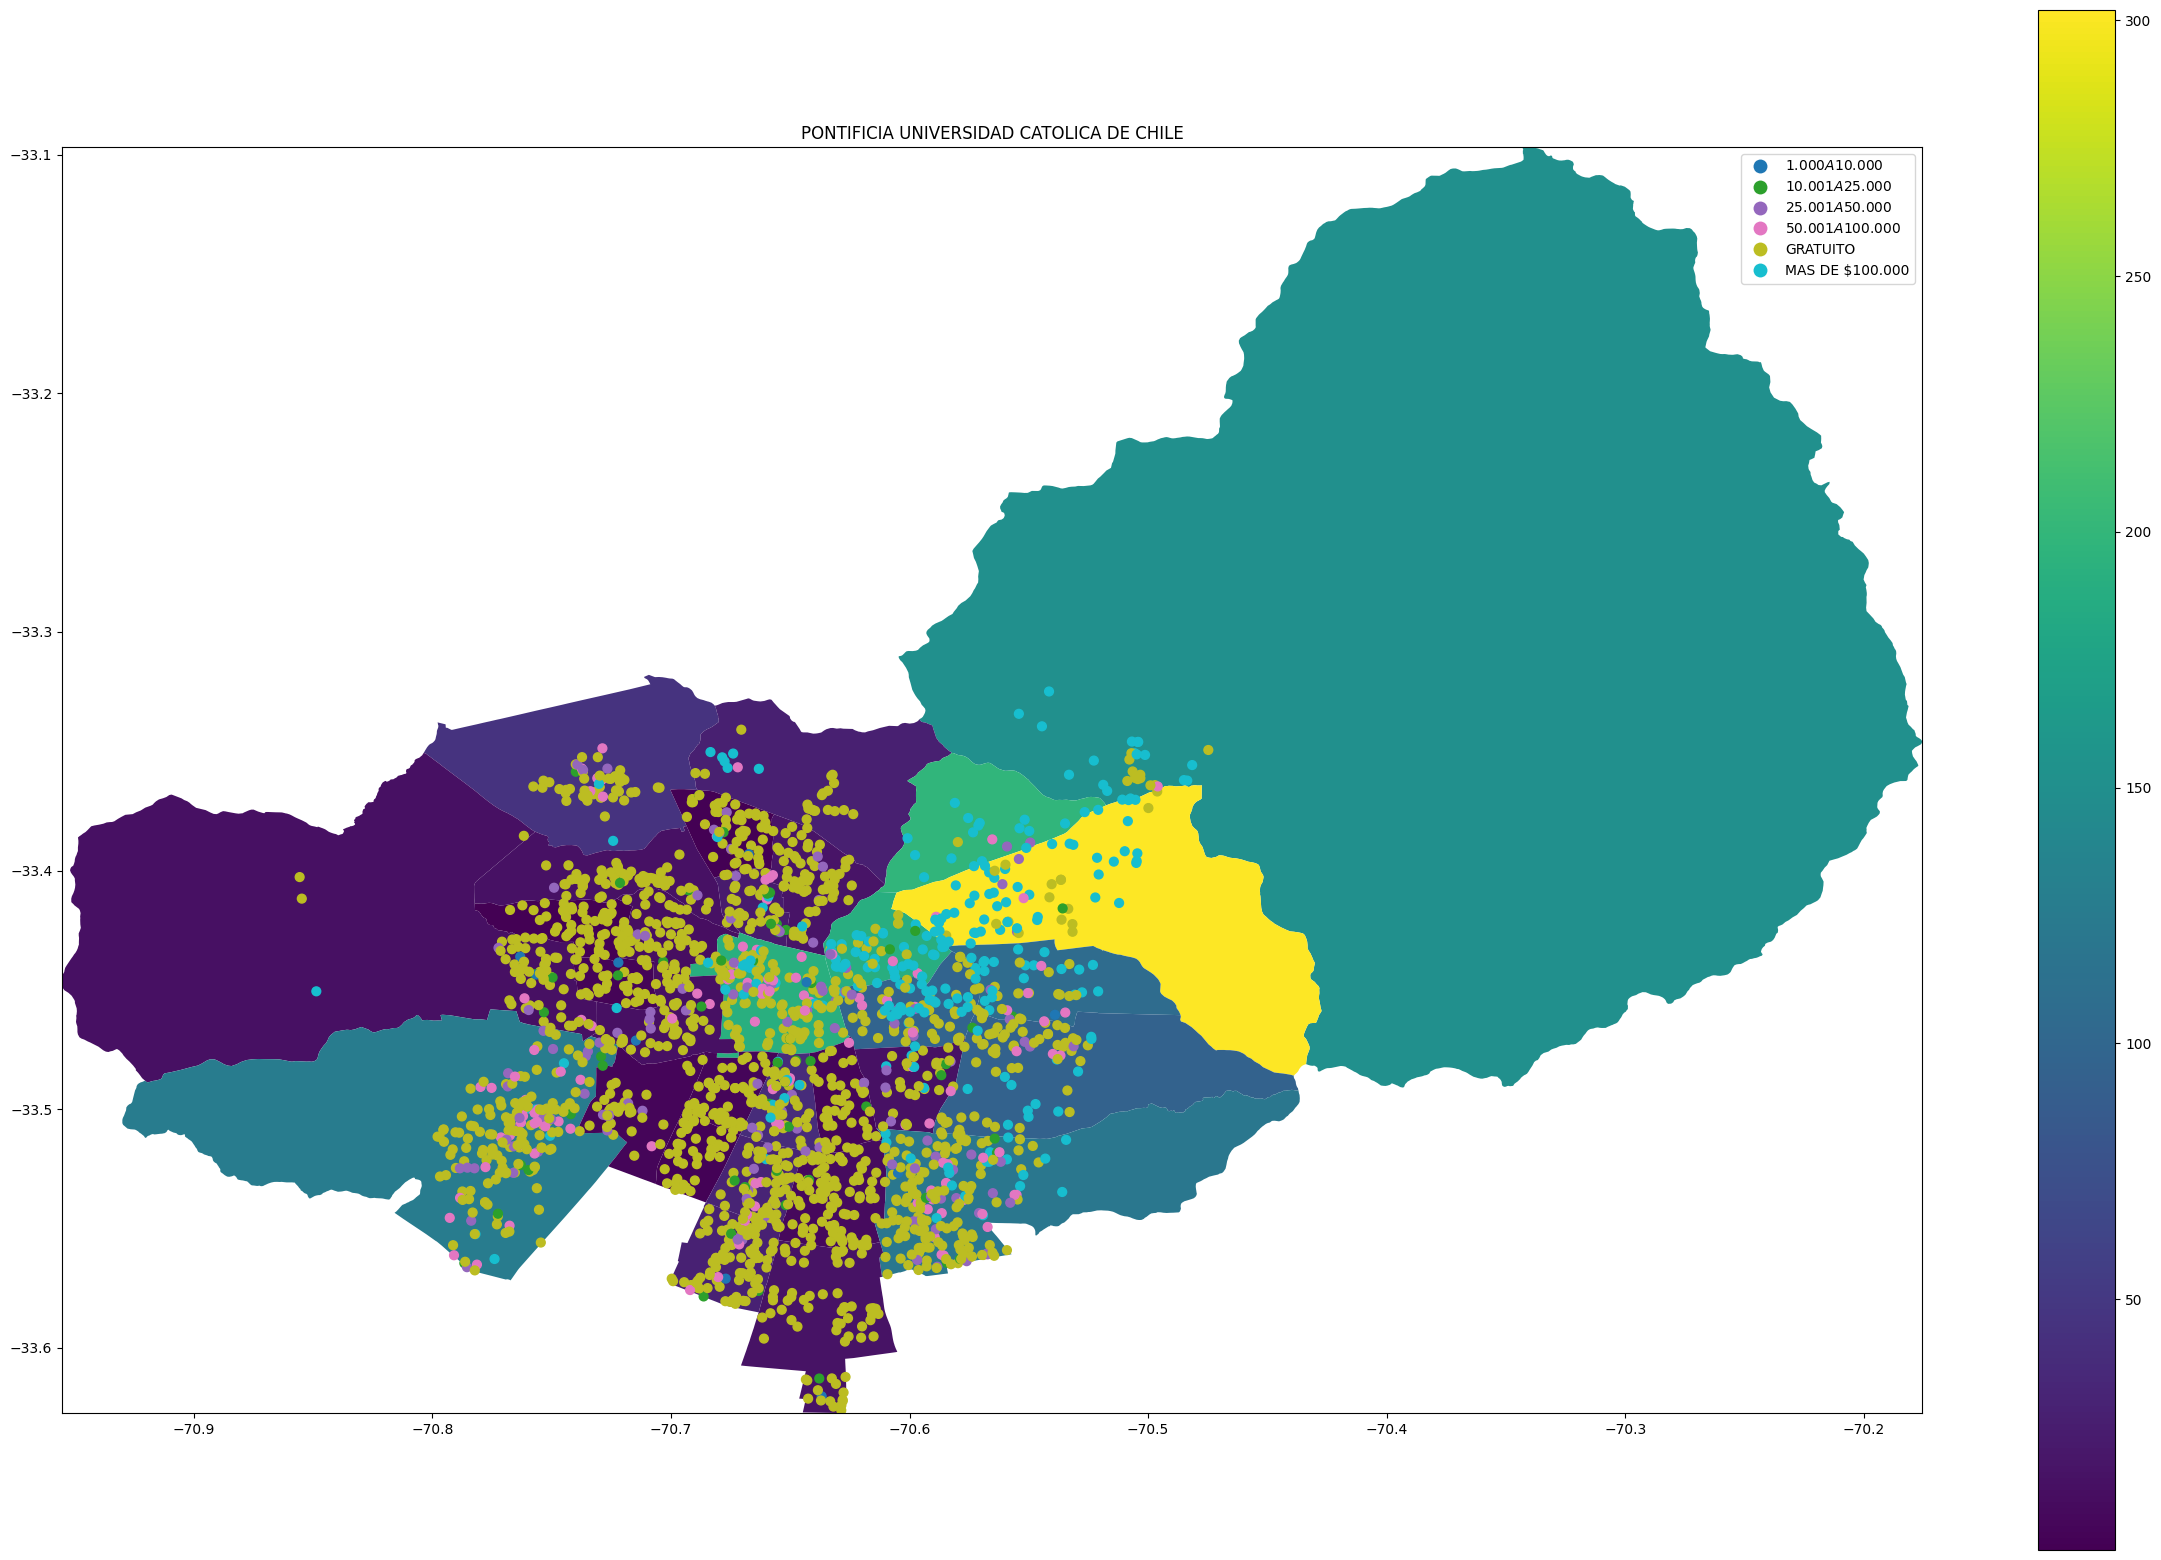

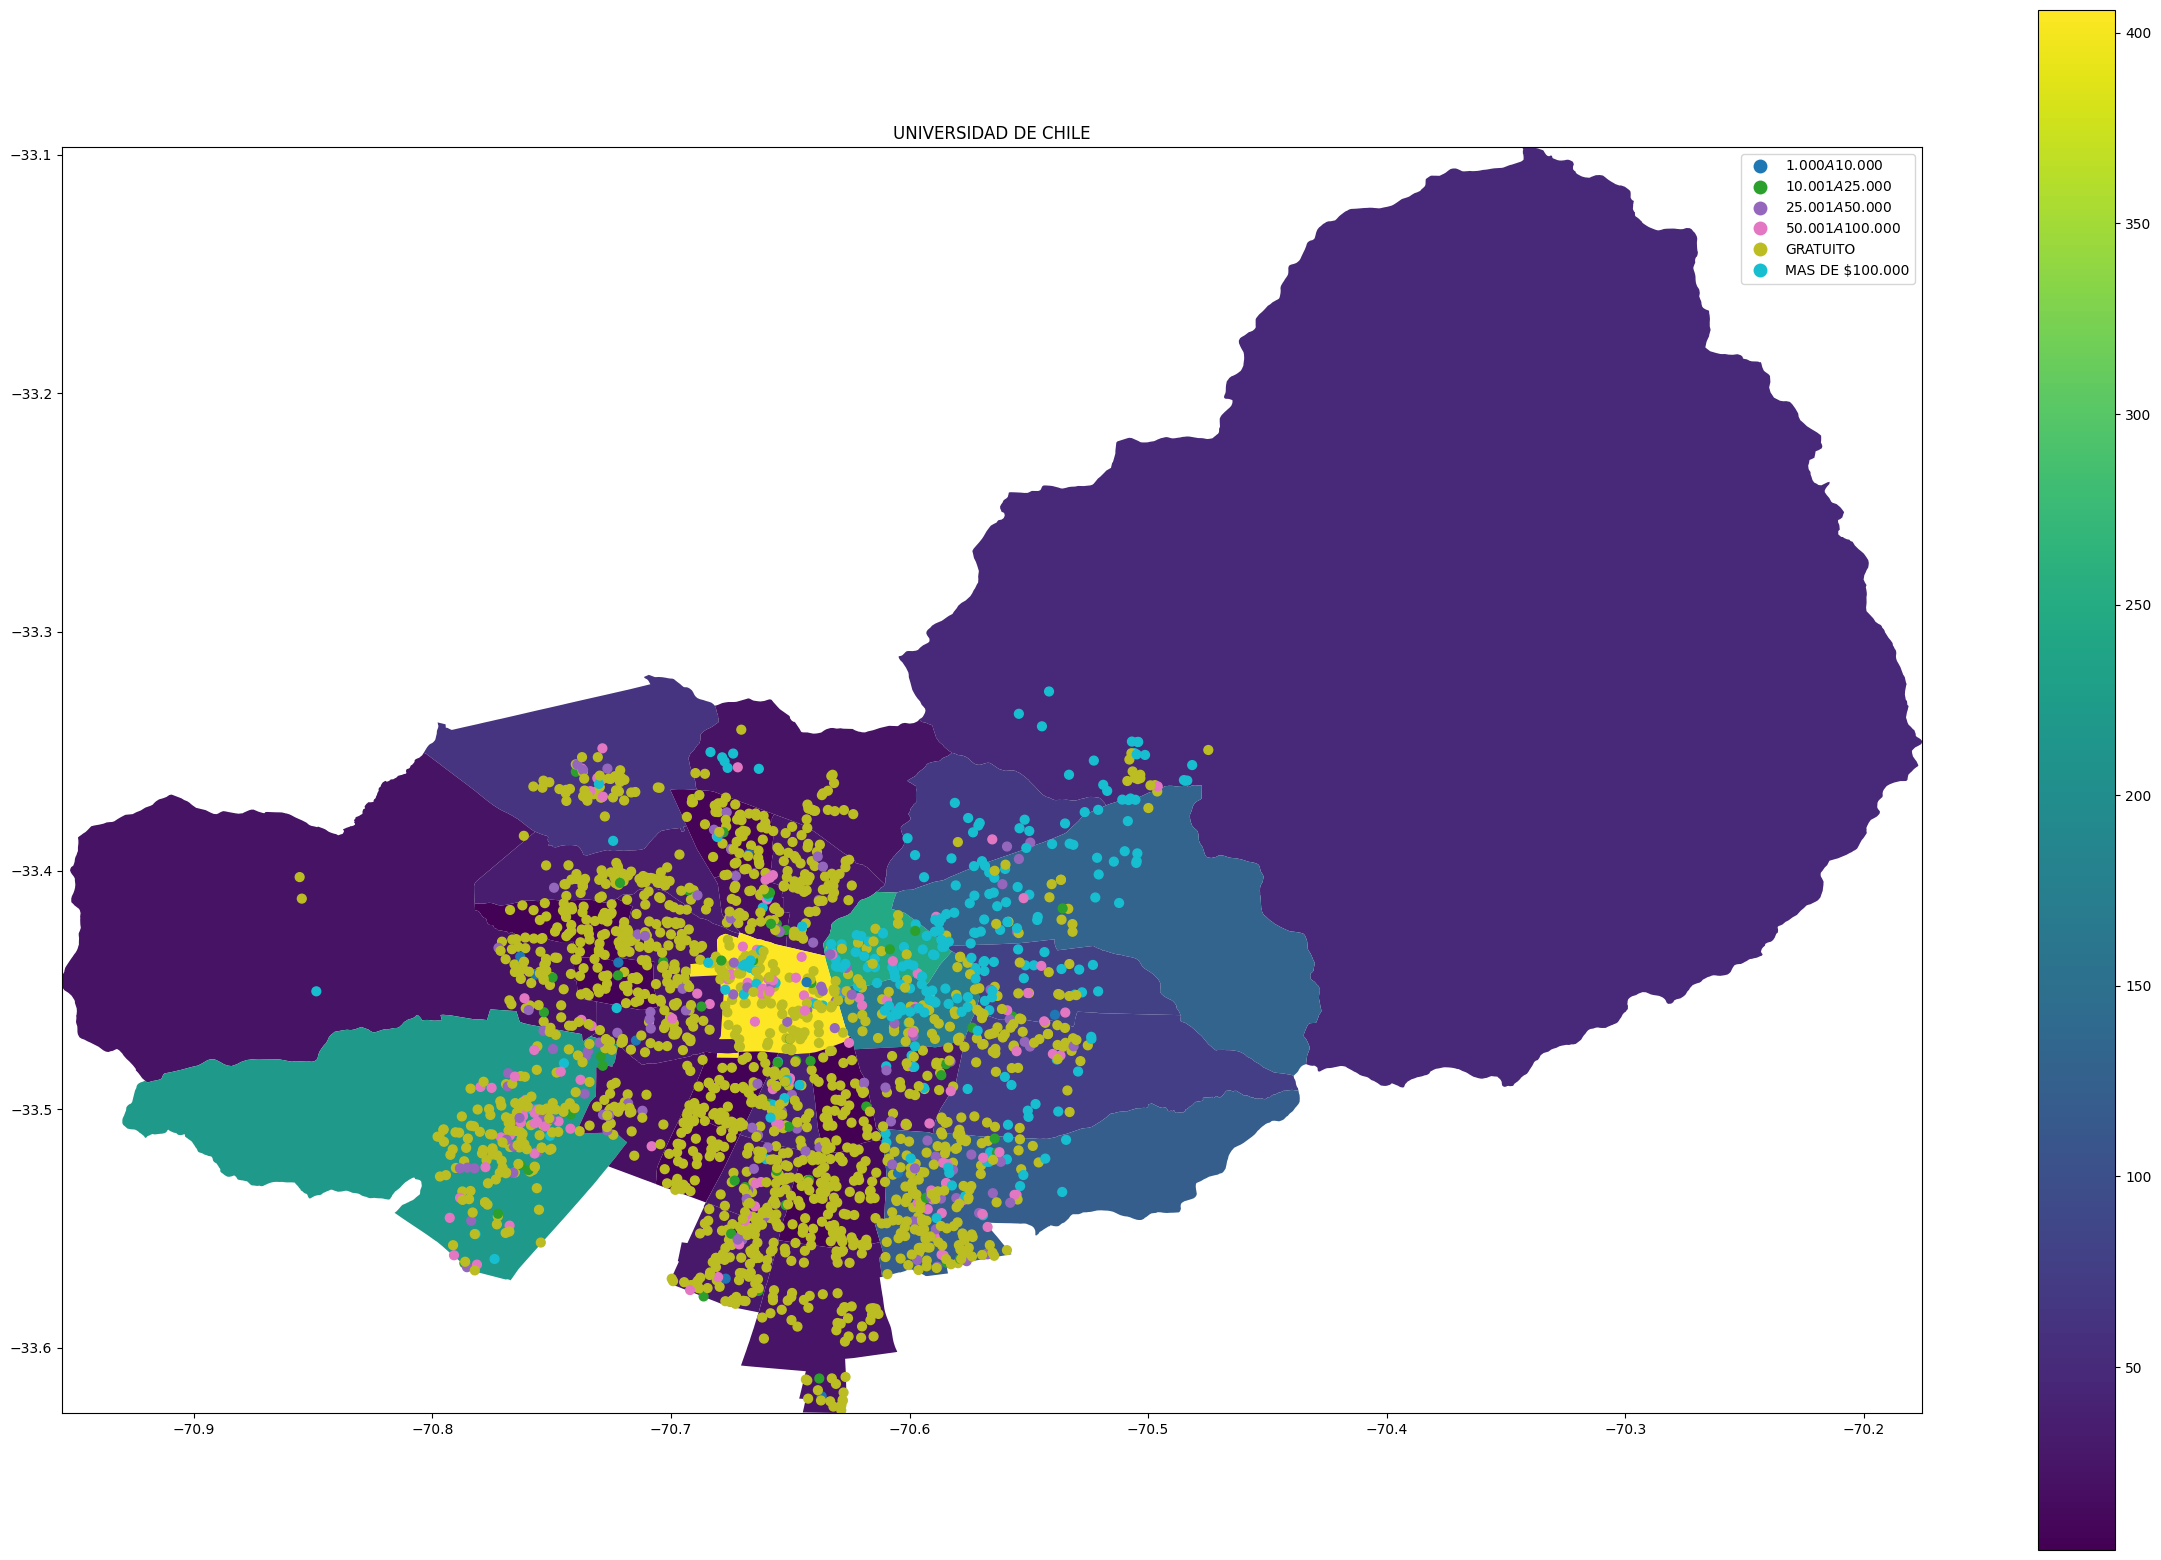

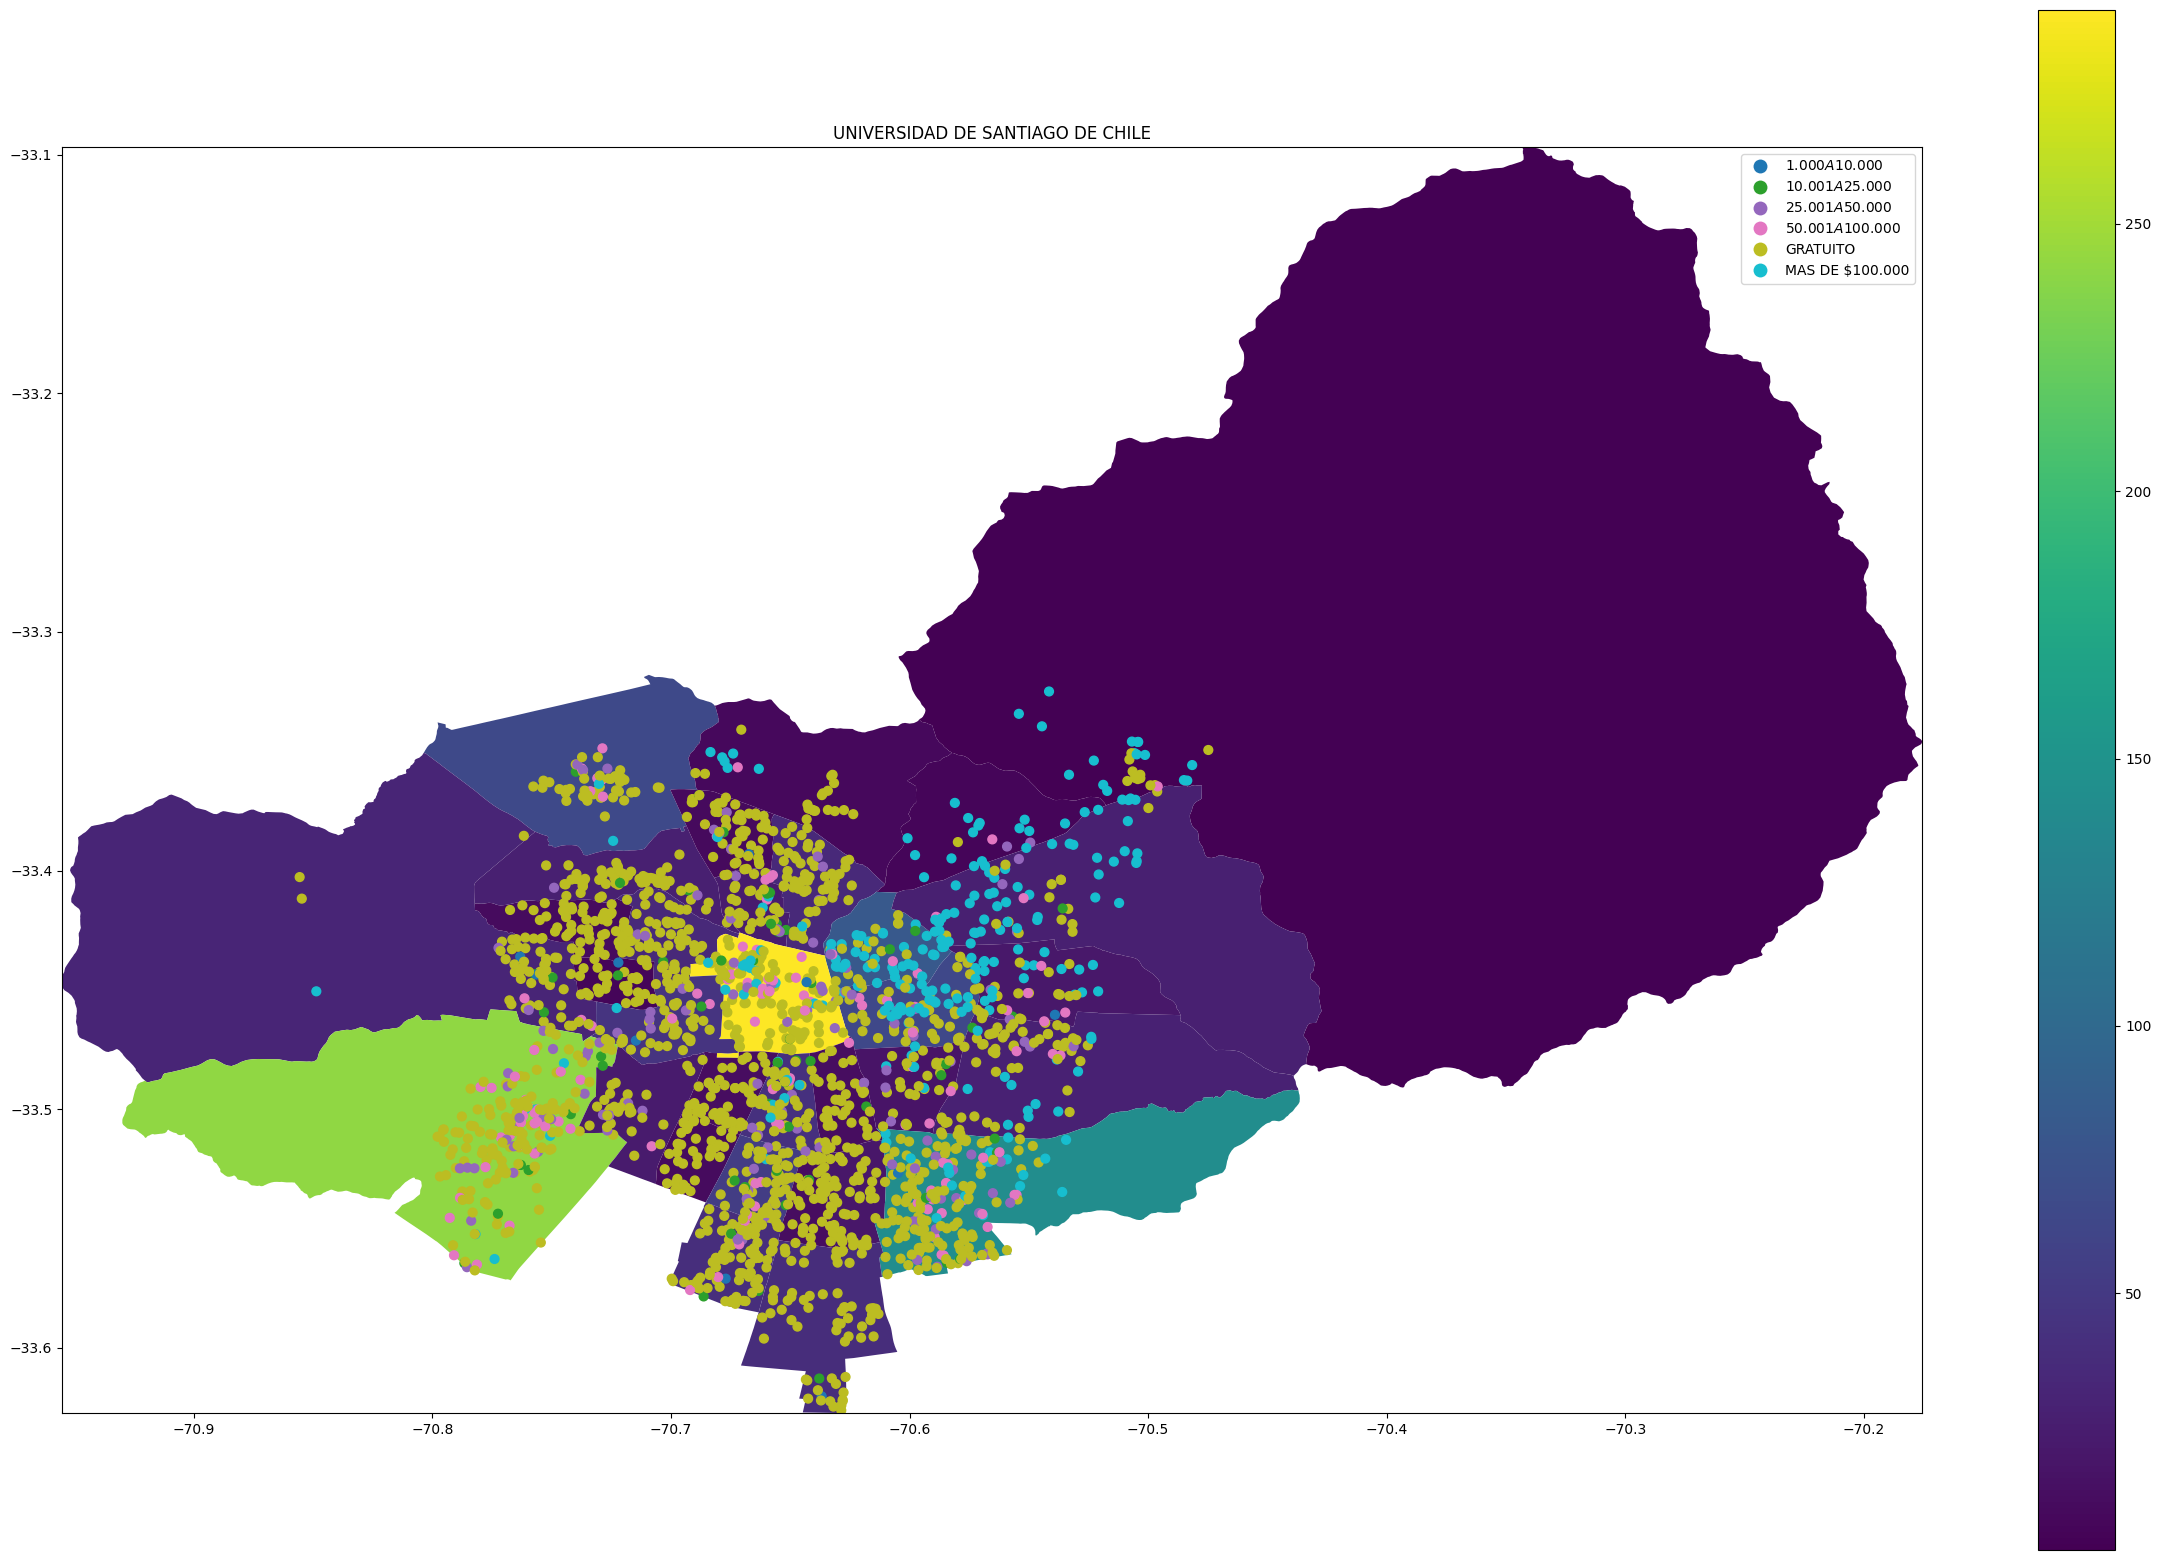

In [79]:
for universidad in lista_universidades_7:
    if universidad != 'UNIVERSIDAD DE CONCEPCION':
        fig, ax = plt.subplots(figsize = (30, 20))
        prov_stgo = comunas[comunas['PROVINCIA'] == 'Santiago']
        prov_stgo.plot(column = universidad, legend = True, ax = ax)
        ub_colegios_stgo = ub_colegios[ub_colegios['COD_PRO_RBD'] == 131]
        ub_colegios_stgo.plot(column = 'PAGO_MENSUAL', categorical = True, ax = ax, legend = True, s = 40)
        bounds = prov_stgo.geometry.total_bounds
        xlim = ([bounds[0],  bounds[2]])
        ylim = ([bounds[1],  bounds[3]])
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        plt.title(universidad)

Observamos que existe una posible relación entre el costo el colar y la elección de la universidad post-escolar, por lo tanto existe un sesgo socioeconomico en el futuro de los estudiantes en Santiago.